# 02 - Data from the Web

# Table of Contents
 <p><div class="lev1"><a href="#Task-1.0-Retrieve-the-Data"><span class="toc-item-num">Task 1.0&nbsp;&nbsp;</span>Retrieve the Data</a></div>
 <div class="lev2"><a href="#Task-1.0.1-Clear-rank-and-drop-data-not-needed"><span class="toc-item-num">1.0.1 &nbsp;&nbsp;</span>Clear rank and drop data not needed</a></div>
 <div class="lev2"><a href="#Task-1.0.2-Test-soup-for-missing-data"><span class="toc-item-num">1.0.2 &nbsp;&nbsp;</span>Test soup for missing data</a></div>
 <div class="lev2"><a href="#Task-1.0.3-Prepare-url-for-missing-data"><span class="toc-item-num">1.0.3 &nbsp;&nbsp;</span>Prepare url for missing data</a></div>
 <div class="lev2"><a href="#Task-1.0.4-Get-missing-data-function"><span class="toc-item-num">1.0.4 &nbsp;&nbsp;</span>Get missing data function</a></div>
 <div class="lev2"><a href="#Task-1.0.5-Prepare-callback-to-import-all-data"><span class="toc-item-num">1.0.5 &nbsp;&nbsp;</span>Prepare callback to import all data</a></div>
 <div class="lev2"><a href="#Task-1.0.6-Import-Data"><span class="toc-item-num">1.0.6 &nbsp;&nbsp;</span>Import Data</a></div>
 <div class="lev2"><a href="#Task-1.0.7-Kill-data-if-needed"><span class="toc-item-num">1.0.7 &nbsp;&nbsp;</span>Kill data if needed</a></div>
 <div class="lev2"><a href="#Task-1.0.8-Store-data-and-continue-compilation"><span class="toc-item-num">1.0.8 &nbsp;&nbsp;</span>Store data and continue compilation</a></div>
 
 <div class="lev1"><a href="#Task-1.1"><span class="toc-item-num">Task 1.1&nbsp;&nbsp;</span> a), b), c), d)</a></div>
 <div class="lev1"><a href="#Task-1.2-Plots"><span class="toc-item-num">Task 1.2&nbsp;&nbsp;</span>Plots of a), b), c), d)</a></div>
 </p>
 
 <p>
 <div class="lev1"><a href="#Task-2.0-Retrieve-the-Data"><span class="toc-item-num">Task 2.0&nbsp;&nbsp;</span>Retrieve the Data</a></div>
 <div class="lev2"><a href="#Task-2.0.1-Clear-rank-and-drop-data-not-needed"><span class="toc-item-num">2.0.1 &nbsp;&nbsp;</span>Clear rank and drop data not needed</a></div>
 <div class="lev2"><a href="#Task-2.0.2-Prepare-url-and-test-soup-to-have-missing-data"><span class="toc-item-num">2.0.2 &nbsp;&nbsp;</span>Prepare url and test soup to have missing data</a></div>
 <div class="lev2"><a href="#Task-2.0.3-Prepare-to-retrieve-data-and-callback-funciton"><span class="toc-item-num">2.0.3 &nbsp;&nbsp;</span>Prepare to retrieve data and callback funciton</a></div>
 <div class="lev2"><a href="#Task-2.0.4-Import-Data"><span class="toc-item-num">2.0.4 &nbsp;&nbsp;</span>Import Data</a></div>
 <div class="lev2"><a href="#Task-2.0.5-Kill-data-second-file"><span class="toc-item-num">2.0.5 &nbsp;&nbsp;</span>Kill data second file</a></div>
 <div class="lev2"><a href="#Task-2.0.6-Store-data-and-continue-compilation"><span class="toc-item-num">2.0.6 &nbsp;&nbsp;</span>Store data and continue compilation</a></div>
 
 <div class="lev1"><a href="#Task-2.1"><span class="toc-item-num">Task 2.1&nbsp;&nbsp;</span> a), b), c), d),</a></div>
 
 <div class="lev1"><a href="#Task-2.1.d-Region"><span class="toc-item-num">Task 2.1.d&nbsp;&nbsp;</span> Region</a></div>
 
 <div class="lev1"><a href="#Task-2.2-Plots"><span class="toc-item-num">Task 2.2&nbsp;&nbsp;</span> Plots of a), b), c), d)</a></div>
 
 <div class="lev1"><a href="#Task-2.2.d-Plot-Region"><span class="toc-item-num">Task 2.2.d&nbsp;&nbsp;</span> Plot Region</a></div>

 
 </p>
 
 <p>
 <div class="lev1"><a href="#Task-3.0-Prepare-for-merge"><span class="toc-item-num">Task 3.0&nbsp;&nbsp;</span>Prepare for merge</a></div>
 <div class="lev1"><a href="#Task-3.1-Merge"><span class="toc-item-num">Task 3.1&nbsp;&nbsp;</span>Merge</a></div>
 
 </p>
 
  <p>
 <div class="lev1"><a href="#Task-4"><span class="toc-item-num">Task 4&nbsp;&nbsp;</span></a></div>
 
 </p>
 
  <p>
 <div class="lev1"><a href="#Task-5"><span class="toc-item-num">Task 5&nbsp;&nbsp;</span></a></div>
 
 </p>

In [1]:
# Import libraries
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
%matplotlib inline

You will need requests-futures which you can get by   
$ ``pip install requests-futures``

### Task 1.0 Retrieve the Data

Obtain the 200 top-ranking universities : name, rank, country and region, number of faculty members (international and total) and number of students (international and total)

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [2]:
# Do the request
request_url = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1507975779496'
r = requests.get(request_url)

In [3]:
univ_vals = r.json()['data']
univ_vals[0]

{'cc': 'US',
 'core_id': '410',
 'country': 'United States',
 'guide': '<a href="/where-to-study/north-america/united-states/guide" class="guide-link" target="_blank">United States</a>',
 'logo': '<img src="https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small_0.jpg" alt="Massachusetts Institute of Technology (MIT)  Logo">',
 'nid': '294850',
 'rank_display': '1',
 'region': 'North America',
 'score': '100',
 'stars': '6',
 'title': 'Massachusetts Institute of Technology (MIT)',
 'url': '/universities/massachusetts-institute-technology-mit'}

In [4]:
univ_df = pd.DataFrame(univ_vals)
univ_df.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge


keep only : 
1. name, rank, country and region
2. number of faculty members (international and total) and number of students (international and total)

second part must be retrieved from different request

### Task 1.0.1 Clear rank and drop data not needed

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

At first I cleaned 'rank_display'. After that I found out I could just assigne the order as rank. This gives a better result since I don't have to clean 'rank_display' neither to bother with interval ranks

In [5]:
#extracts the int value from a rank formatted either as =rank, rank or 
#rank_min-rank_max (last case will be replaced by rank_min)
def clean_rank(r):
    if(r[0] == '='):
        return int(r[1:]) 
    elif len(r) > 3 and r[3] == '-':
            return int(r[:3])
    else:
        return int(r)

In [6]:
#drops useless columns and cleans ranks
univ_dr_df = univ_df.drop('guide', 1).drop('logo', 1).drop('stars', 1).drop('url', 1) \
.drop('score', 1).drop('cc', 1).drop('core_id', 1).drop('nid', 1)
univ_dr_df['rank_display'] = univ_dr_df['rank_display'].map(clean_rank)
univ_dr_df.head()

,country,rank_display,region,title
0,United States,1,North America,Massachusetts Institute of Technology (MIT)
1,United States,2,North America,Stanford University
2,United States,3,North America,Harvard University
3,United States,4,North America,California Institute of Technology (Caltech)
4,United Kingdom,5,Europe,University of Cambridge


In [7]:
#replace rank by index+1 in case this is an invalid way to do, just ignore this cell
univ_dr_df[['rank_display']] = univ_dr_df.index + 1
univ_dr_df.head()

,country,rank_display,region,title
0,United States,1,North America,Massachusetts Institute of Technology (MIT)
1,United States,2,North America,Stanford University
2,United States,3,North America,Harvard University
3,United States,4,North America,California Institute of Technology (Caltech)
4,United Kingdom,5,Europe,University of Cambridge


### Task 1.0.2 Test soup for missing data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [8]:
#Retrieve the soup for the caltech description page
url_caltech = 'https://www.topuniversities.com/universities/california-institute-technology-caltech#wurs'
r_caltech = requests.get(url_caltech)
soup_caltech = BeautifulSoup(r_caltech.text, 'html.parser')
soup_caltech.prettify()[0:600]

'<!DOCTYPE html>\n<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:schema="http://schema.org/" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xm'

From the soup, with a quick ctrl+f on the number displayed on the corresponding page, I was able to identify the elements which contained the value I was interested in:
1. Number of international students ``<div class="int-students-main wrapper col-md-4"> \ <div class="number">``
    
2. Number of students ``<div class="students-main wrapper col-md-4"> \ <div class="number">``

3. Number of faculty staff in total ``<div class="faculty-main wrapper col-md-4"> \ <div class="number">``

4. Number of faculty staff international ``<div class="inter faculty"> \ <div class="number">``

In [9]:
#extracts the number of international students
caltech_inter_st = soup_caltech.find('div', class_='int-students-main wrapper col-md-4').find('div', class_='number').text
caltech_inter_st[1:]

'647 '

In [10]:
#extracts the number of students
caltech_st = soup_caltech.find('div', class_ = 'students-main wrapper col-md-4').find('div', class_='number').text
caltech_st[1:]

'2,255 '

Now we can test with MIT to see whether the parsing works the same (which is probably the case). If it works, then we will iterate over the links in the dataframe to parse the values of interest for each university

In [11]:
#checks if the extraction canvas works for another university
url_mit = 'https://www.topuniversities.com/universities/massachusetts-institute-technology-mit#wurs'
r_mit = requests.get(url_mit)
soup_mit = BeautifulSoup(r_mit.text, 'html.parser')
soup_mit.find('div', class_='int-students-main wrapper col-md-4').find('div', class_='number').text[1:]


'3,717 '

In [12]:
#tries to retrieve the value contained in the child <block_p class = 'class_p'>, hence contained in <block_c class='class_c'
#returns NaN if one of both block is not found
def retrieve(soup, block_p, class_p, block_c, class_c):
    parent = soup.find(block_p, class_p)
    if parent is None:
        return 'failed'
    else:
        child = parent.find(block_c, class_c)
        if child is None:
            return 'failed'
        else:
            return int(child.text[1:].replace(',',''))
    

In [13]:
#test function for valid arguments
retrieve(soup_mit, 'div', 'int-students-main wrapper col-md-4', 'div', 'number')

3717

In [14]:
#test function for invalid argument class_p
retrieve(soup_mit, 'div', 'int-st-main wrapper col-md-4', 'div', 'number')

'failed'

In [15]:
#test function for invalid argument class_c
retrieve(soup_mit, 'div', 'int-students-main wrapper col-md-4', 'div', 'nber')

'failed'

In [16]:
#simplify the call for our usage
def retrieve_div_number(soup, class_p):
    return retrieve(soup, 'div', class_p, 'div', 'number')

In [17]:
#test function with valid arguments
retrieve_div_number(soup_mit, 'int-students-main wrapper col-md-4')

3717

### Task 1.0.3 Prepare url for missing data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [18]:
#Prepare urls for request-loop
u_urls = np.array(univ_df[['url']].values)
univ_urls = []
main_url = 'https://www.topuniversities.com'
for url_ in u_urls:
    url = url_[0]
    univ_urls.append(main_url + url + '#wurs')
univ_urls[:5]

['https://www.topuniversities.com/universities/massachusetts-institute-technology-mit#wurs',
 'https://www.topuniversities.com/universities/stanford-university#wurs',
 'https://www.topuniversities.com/universities/harvard-university#wurs',
 'https://www.topuniversities.com/universities/california-institute-technology-caltech#wurs',
 'https://www.topuniversities.com/universities/university-cambridge#wurs']

In [19]:
len(univ_urls)

959

### Task 1.0.4 Get missing data function

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Since doing the 959 requests in one go didn't work, I will manually split the requests in chunks as big as possible to minimize the merge step

In [20]:
#First attempt to do the requests, too blocking for 959 requests
def get_missing_data(urls):
    international_students = []
    students = []
    international_faculty = []
    faculty = []

    for url in urls:
    
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
    
        inter_st = retrieve_div_number(soup, 'int-students-main wrapper col-md-4')
        st = retrieve_div_number(soup, 'students-main wrapper col-md-4')
        inter_fac = retrieve_div_number(soup, 'faculty-main wrapper col-md-4')
        fac = retrieve_div_number(soup, 'inter faculty')
    
        international_students.append(inter_st)
        students.append(st)
        international_faculty.append(inter_fac)
        faculty.append(fac)

    return international_students, students, international_faculty, faculty

In [21]:
#store result in arrays
inter_s, s, inter_f, f = get_missing_data(univ_urls[:5])

In [22]:
inter_s

[3717, 3611, 5266, 647, 6699]

### Task 1.0.5 Prepare callback to import all data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Since this is super slow, we will use the package future-requests that will make non-blocking requests. While waiting, I will treat only a small part of the data. When requests complete, I store the results in variables and its all good. This is the reason for the small block before the function

In [23]:
#declare globals for second methods
international_st = []
students = []
international_fac = []
fac = []
bad_soups = []
futures = []
num_request = 959 # ew need only 200 but we saw that there are 959 url. So we take all of them and then just take the 200 first values
count = 0

In [24]:
#helper to reset globals
def reset_arrays():
    global international_st
    global students
    global international_fac
    global fac
    global bad_soups 
    global count
    
    international_st = []
    students = []
    international_fac = []
    fac = []
    bad_soups = []
    count = 0
    
    return 0

In [25]:
#proceeds request when completed in background:
# extract soup, extract values
def callback(future):
    r = future.result()
    soup = BeautifulSoup(r.text, 'html.parser')
    
    global international_st
    global students
    global international_fac
    global fac
    global num_request
    global count
    global bad_soups
    count = count + 1
    if count > num_request:
        international_st = []
        students = []
        international_fac = []
        fac = []
        count = 0
    
    inter_st = retrieve_div_number(soup, 'int-students-main wrapper col-md-4')
    st = retrieve_div_number(soup, 'students-main wrapper col-md-4')
    inter_fac = retrieve_div_number(soup, 'inter faculty')
    f = retrieve_div_number(soup, 'faculty-main wrapper col-md-4')
    if(f == 'failed'):
        f = retrieve_div_number(soup, 'total faculty')
    if inter_st == 'failed' or st == 'failed' or inter_fac == 'failed' or f == 'failed':
        bad_soups.append(soup)
    international_st.append(inter_st)
    students.append(st)
    international_fac.append(inter_fac)
    fac.append(f)

### Task 1.0.6 Import Data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Now we can do our 959 requests in background. For it to work, we must recompile the initilisation of arrays as well as the callback function

The following block will play a small sound when the requests are done. For it to work you need to install python-vlc   
$ pip install python-vlc

In [26]:
#plays a fancy sound, customizable with other sounds in the fancy_sounds folder
import vlc
def play_sound_futur(future):
    folder_path = 'fancy_sounds/'
    music_path = 'zelda_small_item.wav'
    p = vlc.MediaPlayer(folder_path + music_path)
    p.play()
    return 0

#plays a other sound, when crash or have data from where we saved the data
def play_sound(music_path):
    folder_path = 'fancy_sounds/'
    p = vlc.MediaPlayer(folder_path + music_path)
    p.play()
    return 0

In [27]:
#initialize session for background threads
from requests_futures.sessions import FuturesSession
session = FuturesSession()

In [28]:
#displays a progress bar for the requests in backgrounds
import threading
from IPython.display import display
import ipywidgets as widgets
import time
import sys
import pickle

def work(progress, num_request):
    global fac
    while(len(fac) <= num_request):
        progress.value = len(fac)/num_request
        
def progress_bar(num_request):
    progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
    
    thread = threading.Thread(target=work, args=(progress, num_request,))
    display(progress)
    thread.start()


In [29]:
#initiate background requests. The number of requests should be customized on the next line

import pickle

def load_data(univ_urls, num_request):

    url_slice = univ_urls[:num_request]
    url_last_idx = len(url_slice) - 1
    reset_arrays()
    for i_url, url in enumerate(url_slice):
        # On fait notre requête GET
        future = session.get(url)
        # On rajoute le callback à appeler quand
        # le résultat de la requête arrive.
        if i_url != url_last_idx:
            futures.append(future)
        future.add_done_callback(callback)
        if i_url == (url_last_idx):
            future.add_done_callback(play_sound_futur)

In [30]:
# here we have the nb of request that we want to load
# if you delete the file you can see the progress bar to see the loading of the data
#if you don't have the file save.p it loads the data otherwise we take the data from save.p

progress_bar(num_request)

try:
    data = pickle.load(open("save.p", "rb"))
    international_st = data[0]
    students = data[1]
    international_fac = data[2]
    fac = data[3]
    num_request_file = data[4]
    
    print(num_request_file)
    
    if(num_request_file != num_request):
        play_sound('Slurp.wav')
        load_data(univ_urls, num_request)
    else:
        play_sound('smb_1-up.wav')
        
except (OSError, IOError) as e:
    load_data(univ_urls, num_request)


A Jupyter Widget

959


In [31]:
url_slice = univ_urls[:50]


missing data (NaN fields):
    1. [400:500] Universidad Externado de Colombia missing international students (can put 0)
    2. [500:600] Iran University of Science and Technology missing international fac/students (can put 0)
    3. [600:700]
        1. Jadavpur University:             missing international fac (can put 0)
        2. Universidad Iberoamericana IBERO missing international fac/students (can put 0)
        3. University of Haifa              "--------------------------------------------"
        4. University of Hyderabad          missing international fac (can put 0)
        5. Anna University                  missing international fac/students (can put 0)
        6. Universidad del Pais Vasco       missing international fac (can put 0)
        7. University of Minho              missing internation fac/students (can put 0)
        8. University of Minho              "------------------------------------------"
    4. [700:800]
        1. Comenius University in Bratislava   missing international fac (can put 0)
        2. Memorial University of Newfoundland "------------------------------------"
        3. Rhodes University                   "------------------------------------"
        4. Paris Lodron University of Salzburg "------------------------------------"
        5. University of Colombo               "------------------------------------"

it seems the NaN values can be replaced by 0, I won't check the last ones since there are 15 in the next category and 13 in the last respectively [800:900] and [900:]

In [32]:
#At this point, there must be 38 bad soups when you run all requests. All bad soups values are replaced by 0 later
len(bad_soups)

0

### Task 1.0.7 Kill data if needed

### <b> Warning: Running the following cell will cancell all pending requests, corrupting the data in the process </b>
Note that to run the cell you have to change 'False' in 'True' in the if statement

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [33]:
# attempts to kill waiting requests: if attempt is successful, bar doesn't move. Goal is to cancel all but last requests
# in order to instantly play sound and complete only one request
def reset_futures():
    global futures 
    for fu in futures:
        # cancel request on this url
        fu.cancel()
        #print("dead")
    futures = []    
    return 0

#Last try it seemed to work. We reset arrays twice since the canceling of
#asynchronous requests is asynchronous, the reset might happen before all requests are canceled
#and some requests might finish in the meantime (after reset)
;

''

#### <b> Next block will close background requests, uncomment and use carefully </b>

In [34]:
#bad_soups contains all the soups from which we were unable to scrap data. 
#After requests are finished, the block should compile to 0
len(bad_soups)

0

### <b>Task 1.0.8 Store data and continue compilation</b>


<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [35]:
# this is to store the data if we don't have the file save.p and reset the futurs after loading

def store_data():
    global international_st
    global students
    global international_fac
    global fac
    global num_request
    
    data = [international_st, students, international_fac, fac, num_request]
    pickle.dump(data, open("save.p", "wb"))
    reset_futures()
    
    
# you can delete the file but you have to uncomment this part to save the data in the file

#store_data() # decoment here after the Zelda sound and recomment don't need to store data everytime

Si vous lancez de nouvelles requête avant que les précédentes soient terminées, vous avez de forte chances que la data soit corrompue. Dans ce cas attendez la fin des requêtes en cours, puis relancez la boucle ci-dessus

You can see the requests progress here. If you want to do something else, a sound will be played as the requests complete

Now that you finished your coffee and were alerted by the fancy sounds that you could pursue the compilation, we can finally use our well-deserved data

In [36]:
#construct dataframe from individual pages'info
missing_df = pd.DataFrame(data= [international_st, students, international_fac, fac],
                         index = ['inter_st', 'students', 'inter_fac', 'fac']).transpose()
missing_df.head()

,inter_st,students,inter_fac,fac
0,3717,11067,1679,2982
1,3611,15878,2042,4285
2,5266,22429,1311,4350
3,647,2255,350,953
4,6699,18770,2278,5490


In [37]:
#merge the two daframes to have all infos needed
univ_tot_df = pd.concat([univ_dr_df, missing_df], axis = 1)
# Finally take the only 200 first (so if we want to see more we already have the data)
univ_tot_df = univ_tot_df[:200]
univ_rk_df = univ_tot_df.set_index(['rank_display'])
univ_rk_df.head()

,country,region,title,inter_st,students,inter_fac,fac
rank_display,,,,,,,
1,United States,North America,Massachusetts Institute of Technology (MIT),3717,11067,1679,2982
2,United States,North America,Stanford University,3611,15878,2042,4285
3,United States,North America,Harvard University,5266,22429,1311,4350
4,United States,North America,California Institute of Technology (Caltech),647,2255,350,953
5,United Kingdom,Europe,University of Cambridge,6699,18770,2278,5490


### Task 1.1

Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?, (c) country, (d) region

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

(a) ratio between faculty members and students

#### Warning
Le dataframe contient des NaN lorsque la requête n'a pas réussi à récupérer de valeur. Le choix a été fait de drop les universités qui contenaient des NaN. A discuter

In [38]:
#Add a columns in which each cell is the result of col1/col2 for corresponding cells in col1, col2
#The returned dataframe is sorted in ascending(1)/descending(0) order depending on the value of the parameter
def ratio(df, col1, col2, ascending_ = 0):
    ratio_df = df.copy().replace('failed', 0)
    ratio_df['ratio'] = ratio_df[col1] / ratio_df[col2]
    ratio_df_sorted = ratio_df.sort_values(['ratio'], ascending = ascending_)
    return ratio_df_sorted

In [39]:
ratio_mem_stu = ratio(univ_tot_df, 'fac', 'students', ascending_ = 0)
ratio_mem_stu.head(5)

,country,rank_display,region,title,inter_st,students,inter_fac,fac,ratio
3,United States,4,North America,California Institute of Technology (Caltech),647,2255,350,953,0.422616
14,Singapore,15,Asia,National University of Singapore (NUS),2469,12402,1708,4940,0.398323
5,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,0.342292
4,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,0.292488
16,United States,17,North America,Johns Hopkins University,4105,16146,1061,4462,0.276353


The ratio of faculty/students seems correlated with the ranking

(b) ratio of international students

In [40]:
ratio_int = ratio(univ_tot_df, 'inter_st', 'students', ascending_ = 0)
ratio_int.head(5)

,country,rank_display,region,title,inter_st,students,inter_fac,fac,ratio
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,6748,9760,687,1088,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),5896,10343,1300,1695,0.570047
7,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,0.543567
198,Netherlands,199,Europe,Maastricht University,8234,16385,502,1277,0.502533
47,United States,48,North America,Carnegie Mellon University,6385,13356,425,1342,0.478062


The ratio of international_students/students seems correlated with the ranking

(c) country

In [41]:
#Returns a multi_indexed dataframe sorted by the argument col as higher index and argument rank as second index
def sortby_col_rank(df, col):
    univ_col = df.set_index([col, 'rank_display'])
    univ_col.sort_index(level=[col, 'rank_display'], ascending=[1, 1], inplace=True)
    return univ_col

In [42]:
country_df = sortby_col_rank(univ_tot_df, 'country')
us_univ = country_df.loc['United States']
#us_univ.head(5)
country_df.head(11)

region  \
country   rank_display                  
Argentina 75            Latin America   
Australia 20                  Oceania   
          42                  Oceania   
          45                  Oceania   
          47                  Oceania   
          50                  Oceania   
          60                  Oceania   
          93                  Oceania   
          111                 Oceania   
          176                 Oceania   
Austria   154                  Europe   

                                                                  title  \
country   rank_display                                                    
Argentina 75                          Universidad de Buenos Aires (UBA)   
Australia 20                         The Australian National University   
          42                                The University of Melbourne   
          45            The University of New South Wales (UNSW Sydney)   
          47                               The University of Queensland   
          50                                   The University of Sydney   
          60                                          Monash University   
          93                        The University of Western Australia   
          111                                The University of Adelaide   
          176                           University of Technology Sydney   
Austria   154                                      University of Vienna   

                       inter_st students inter_fac    fac  
country   rank_display                                     
Argentina 75              27109   122301      3165  16421  
Australia 20               4250    20639      1383   5499  
          42              18030    42182      1477   3311  
          45              14292    39784      1612   2924  
          47              10420    37497      1870   3158  
          50              17030    46678      1829   3360  
          60              20578    57433      1679   3204  
          93               7081    45612       211   3509  
          111              3488    26513       581   2324  
          176              7769    24207       546   1328  
Austria   154             14468    45967      1400   3411

(d) region

In [43]:
region_df = sortby_col_rank(univ_tot_df, 'region')
region_df.head()

country  \
region rank_display                 
Africa 191           South Africa   
Asia   11               Singapore   
       15               Singapore   
       25                   China   
       26               Hong Kong   

                                                                 title  \
region rank_display                                                      
Africa 191                                     University of Cape Town   
Asia   11            Nanyang Technological University, Singapore (NTU)   
       15                       National University of Singapore (NUS)   
       25                                          Tsinghua University   
       26                                  The University of Hong Kong   

                    inter_st students inter_fac   fac  
region rank_display                                    
Africa 191              3325    19593       379  1733  
Asia   11               7251    25738      2993  4338  
       15               2469    12402      1708  4940  
       25               4072    36300       932  5506  
       26               8230    20214      2085  3012

### Task 1.2 Plots

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

(a) Plot ratio between faculty members and students

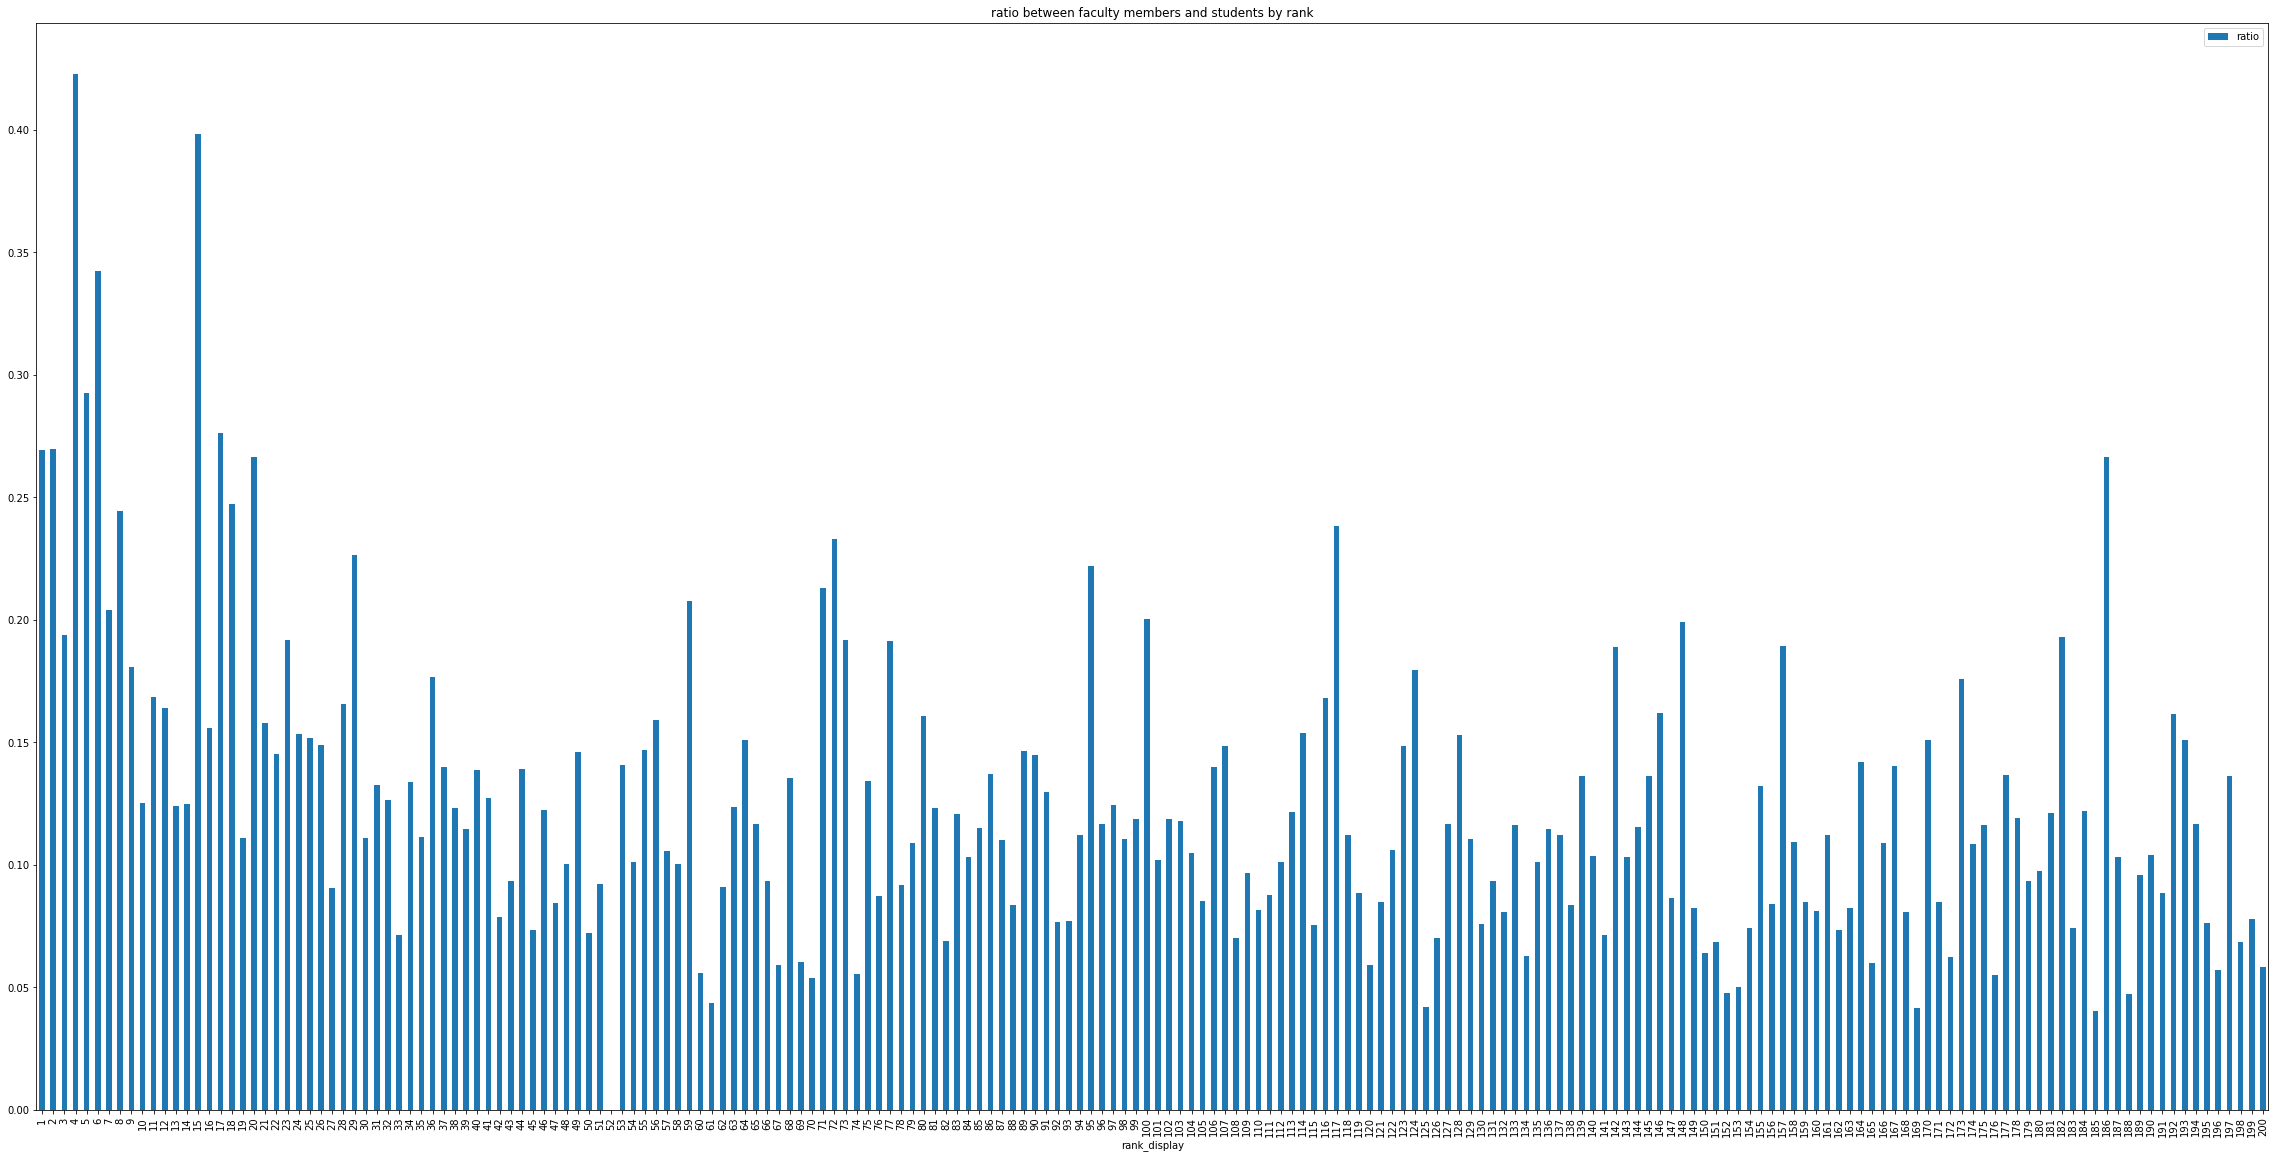

In [44]:
# We only take the rank and the ratio that we need. We sort the rank and plot the result

df_rank_mem_stu = ratio_mem_stu[["rank_display", "ratio"]]
df_rank_mem_stu = df_rank_mem_stu.set_index("rank_display")
df_rank_mem_stu = df_rank_mem_stu.sort_index()
df_rank_mem_stu.plot(kind = 'bar', title ="ratio between faculty members and students by rank", figsize=(40,20));

We can see that the first Universities have a large ratio between faculty members and students. This is the reason why there are first because, because there are more good teachers are maybe better and the students too. So the ranking will be high

(b) Plot ratio of international students

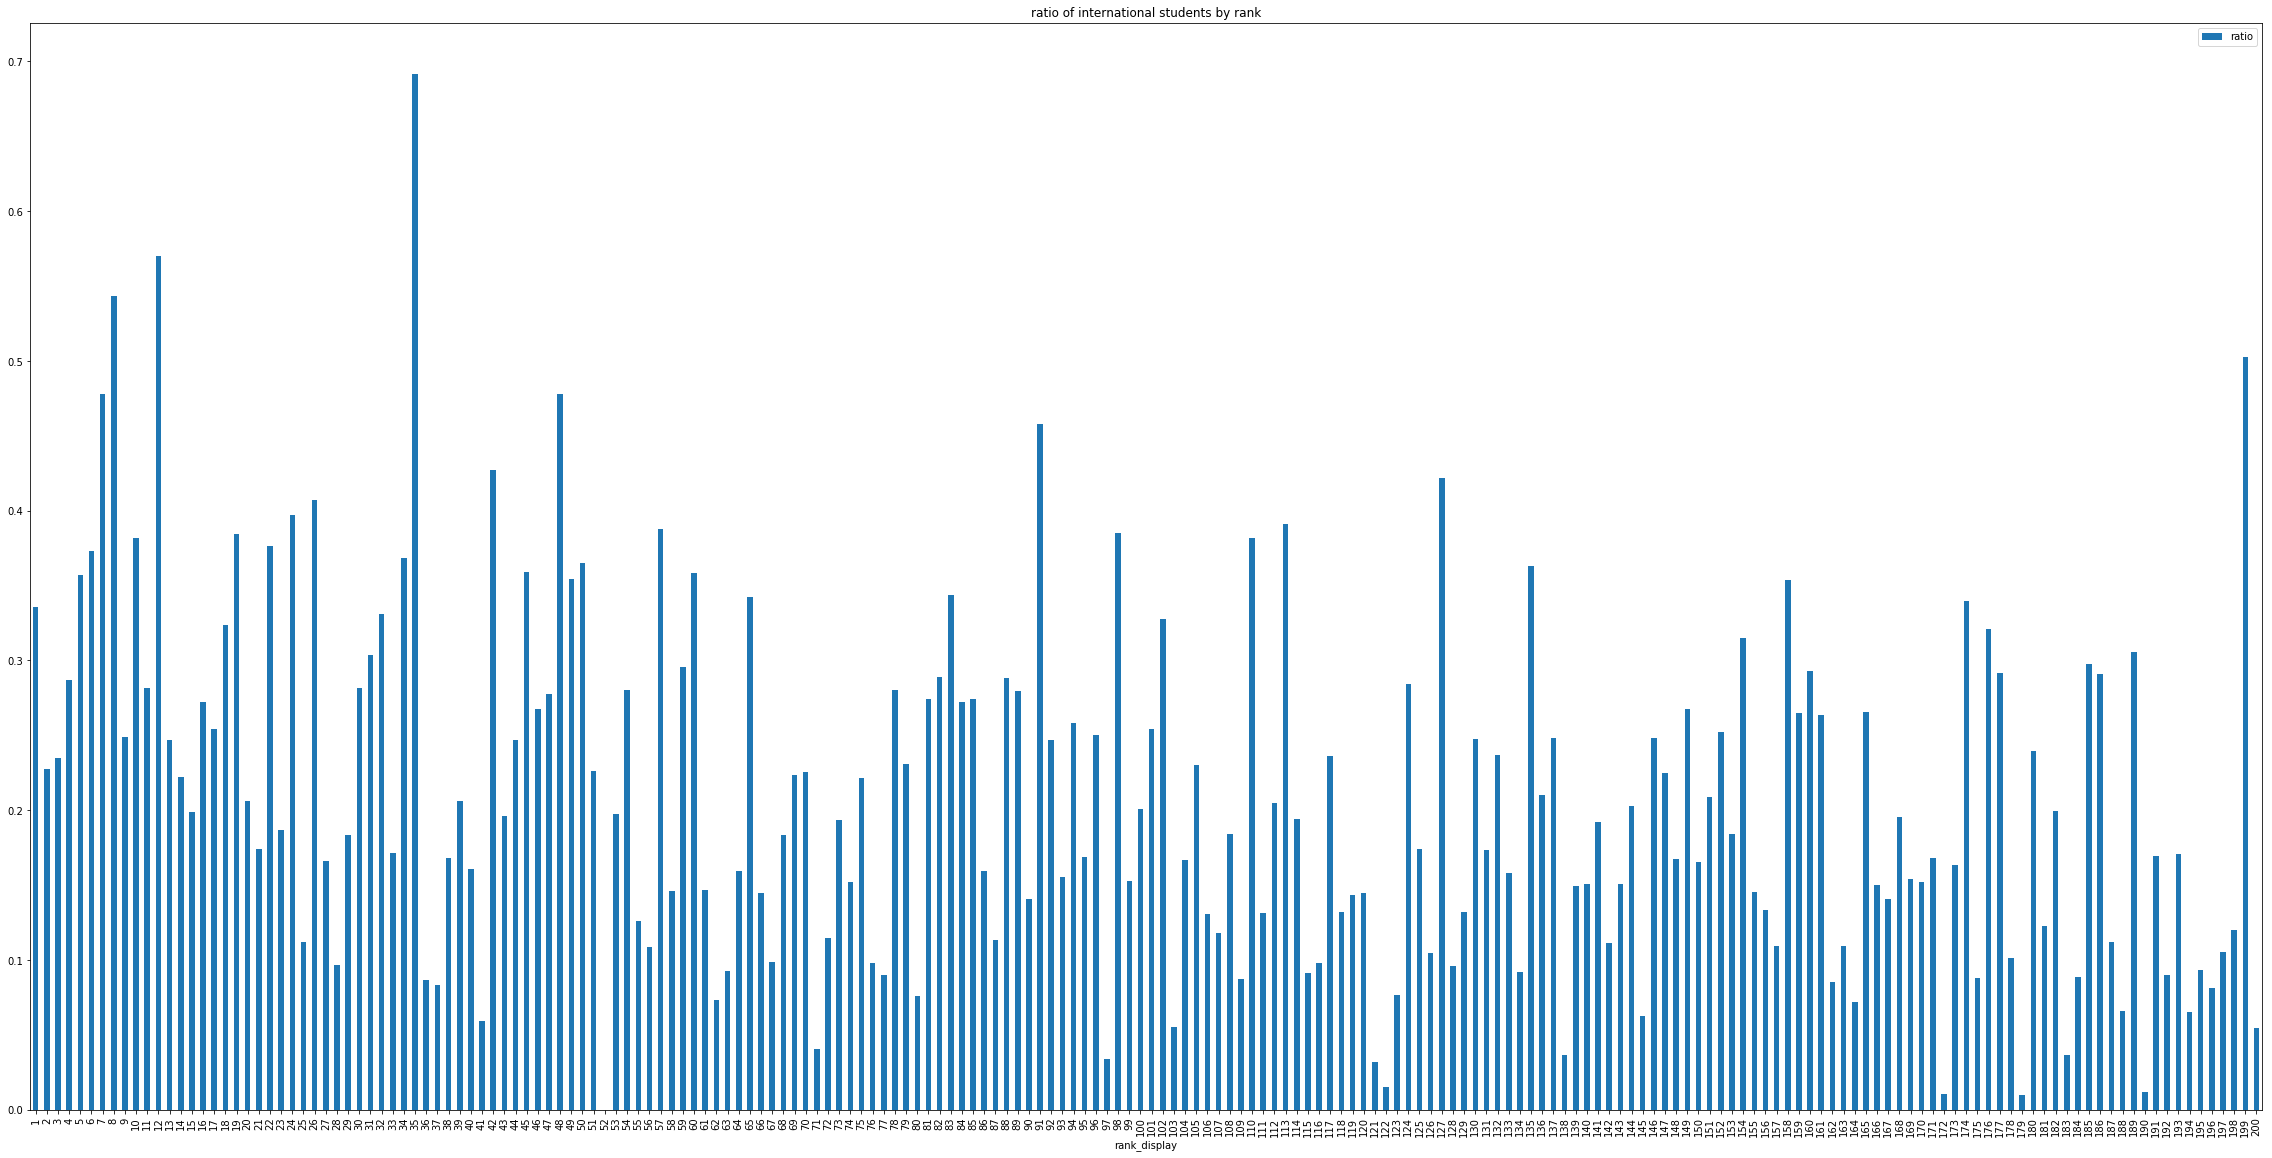

In [45]:
# As before, we only take the rank and the ratio that we need. We sort the rank and plot the result

df_rank_int_stu = ratio_int[["rank_display", "ratio"]]
df_rank_int_stu = df_rank_int_stu.set_index("rank_display")
df_rank_int_stu = df_rank_int_stu.sort_index()
df_rank_int_stu.plot(kind = 'bar', title ="ratio of international students by rank", figsize=(40,20));

The ratio of international student seems to have a very small inpact in the ranking. The best University have a small amount of international student but the some university with a big ratio have a good rank too. So it seems to have a little correlation but not as much as the ratio of faculty member and students

c) Plot Number of University in Country

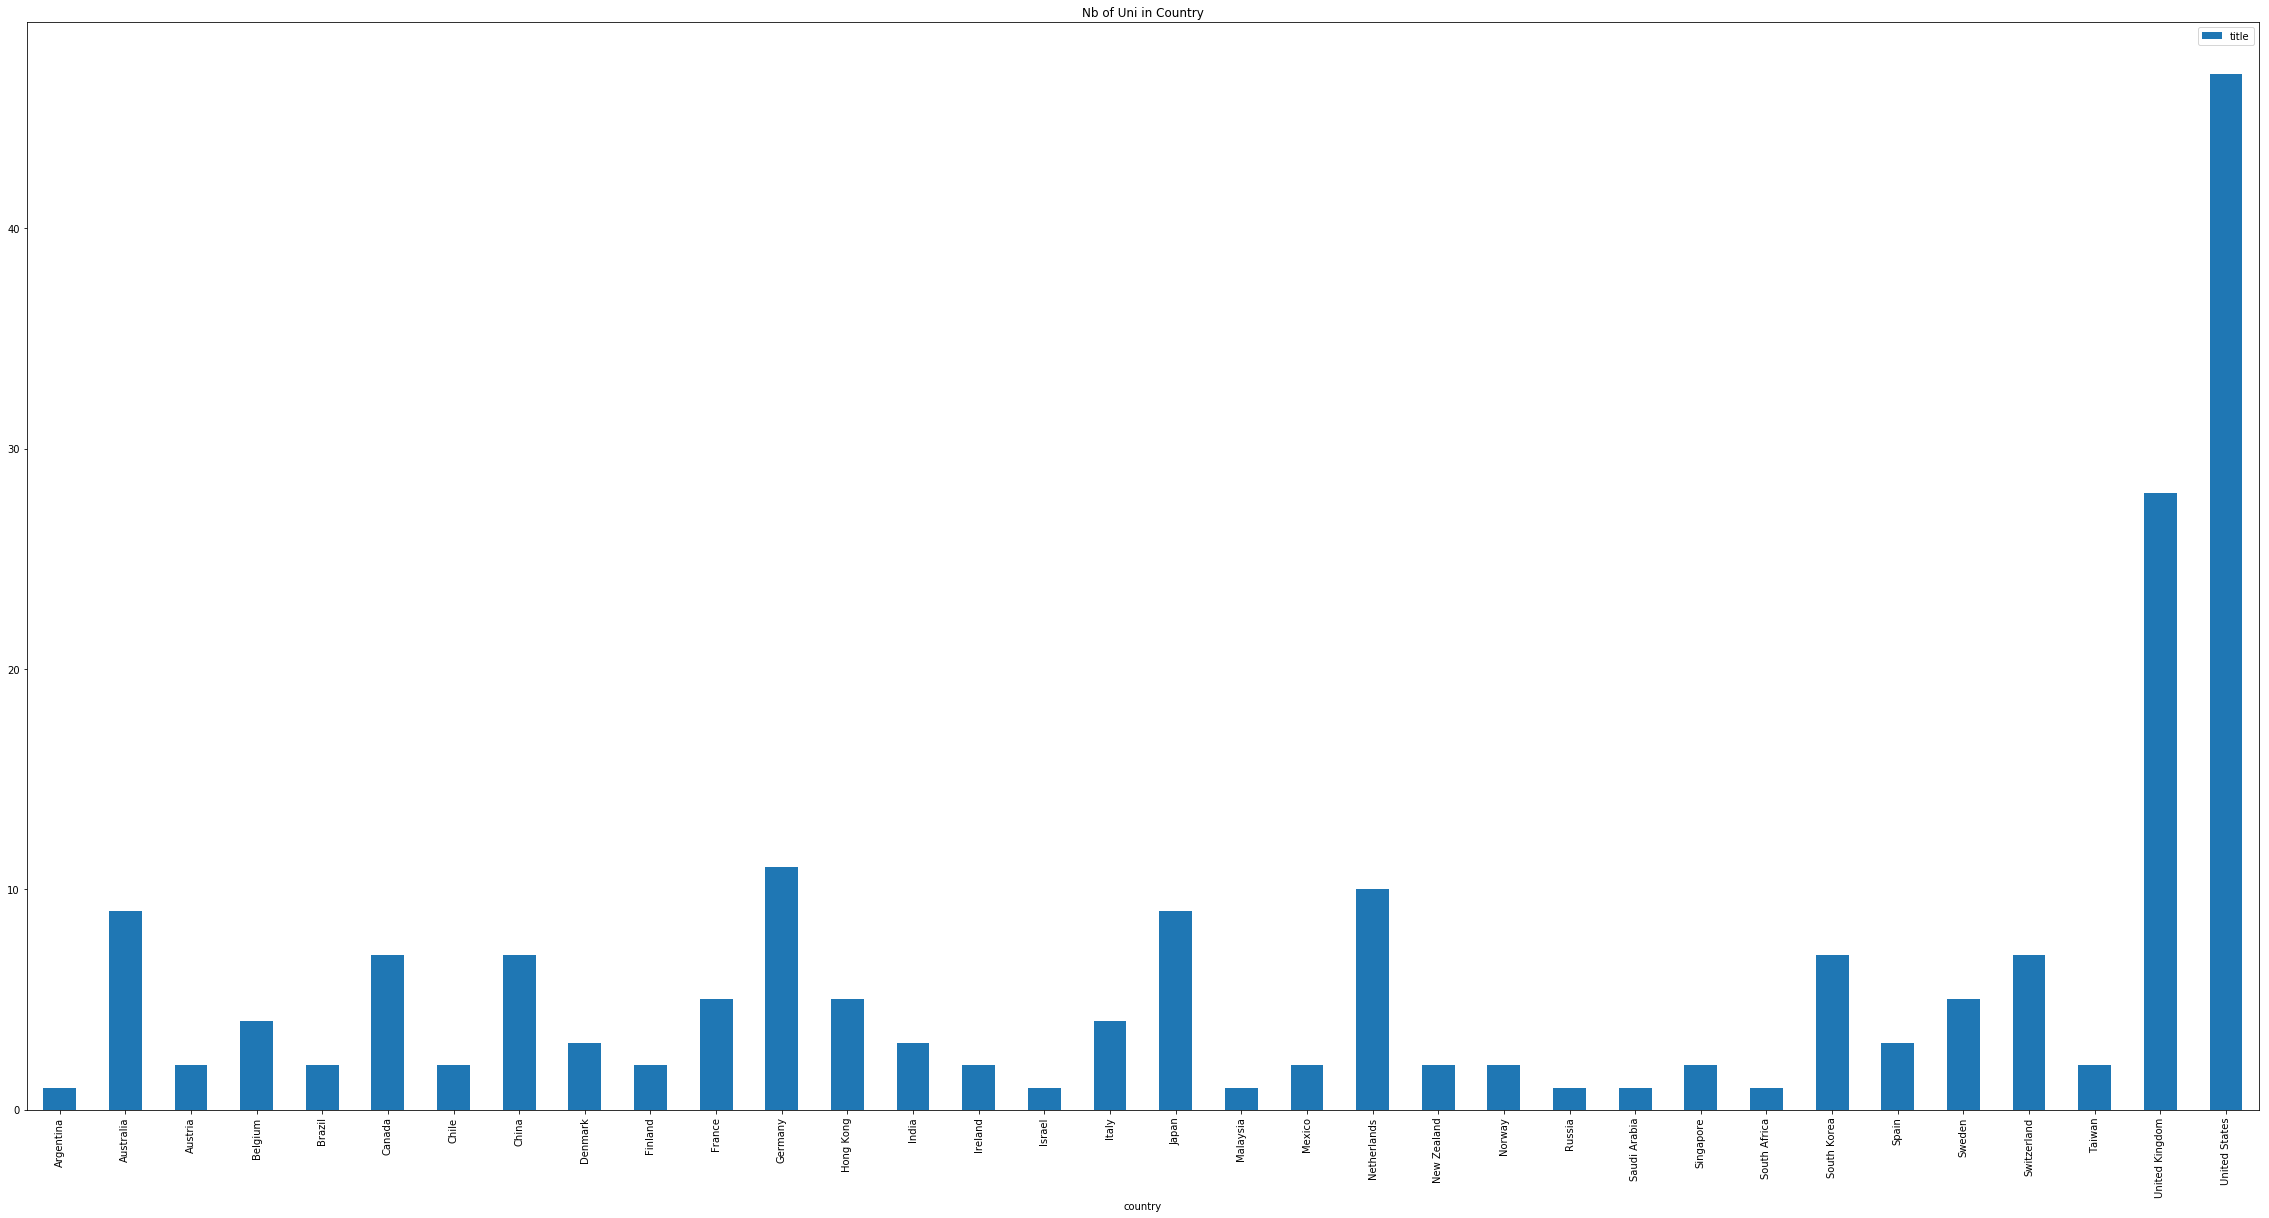

In [46]:
# Here we take only the country and the title and count the number of Univertity that are in each country

df_country_nb_uni = country_df.reset_index()
df_country_nb_uni =df_country_nb_uni[["country", "title"]]
df_country_nb_uni = df_country_nb_uni.groupby(['country']).count()
df_country_nb_uni.plot(kind = 'bar', title ="Nb of Uni in Country", figsize=(40,20));

We can see that the top 200 University are in United Kingdom ans USA. But maybe the region will give more details but we can see that many Universities come from Europe

d) Plot Number of University in Region

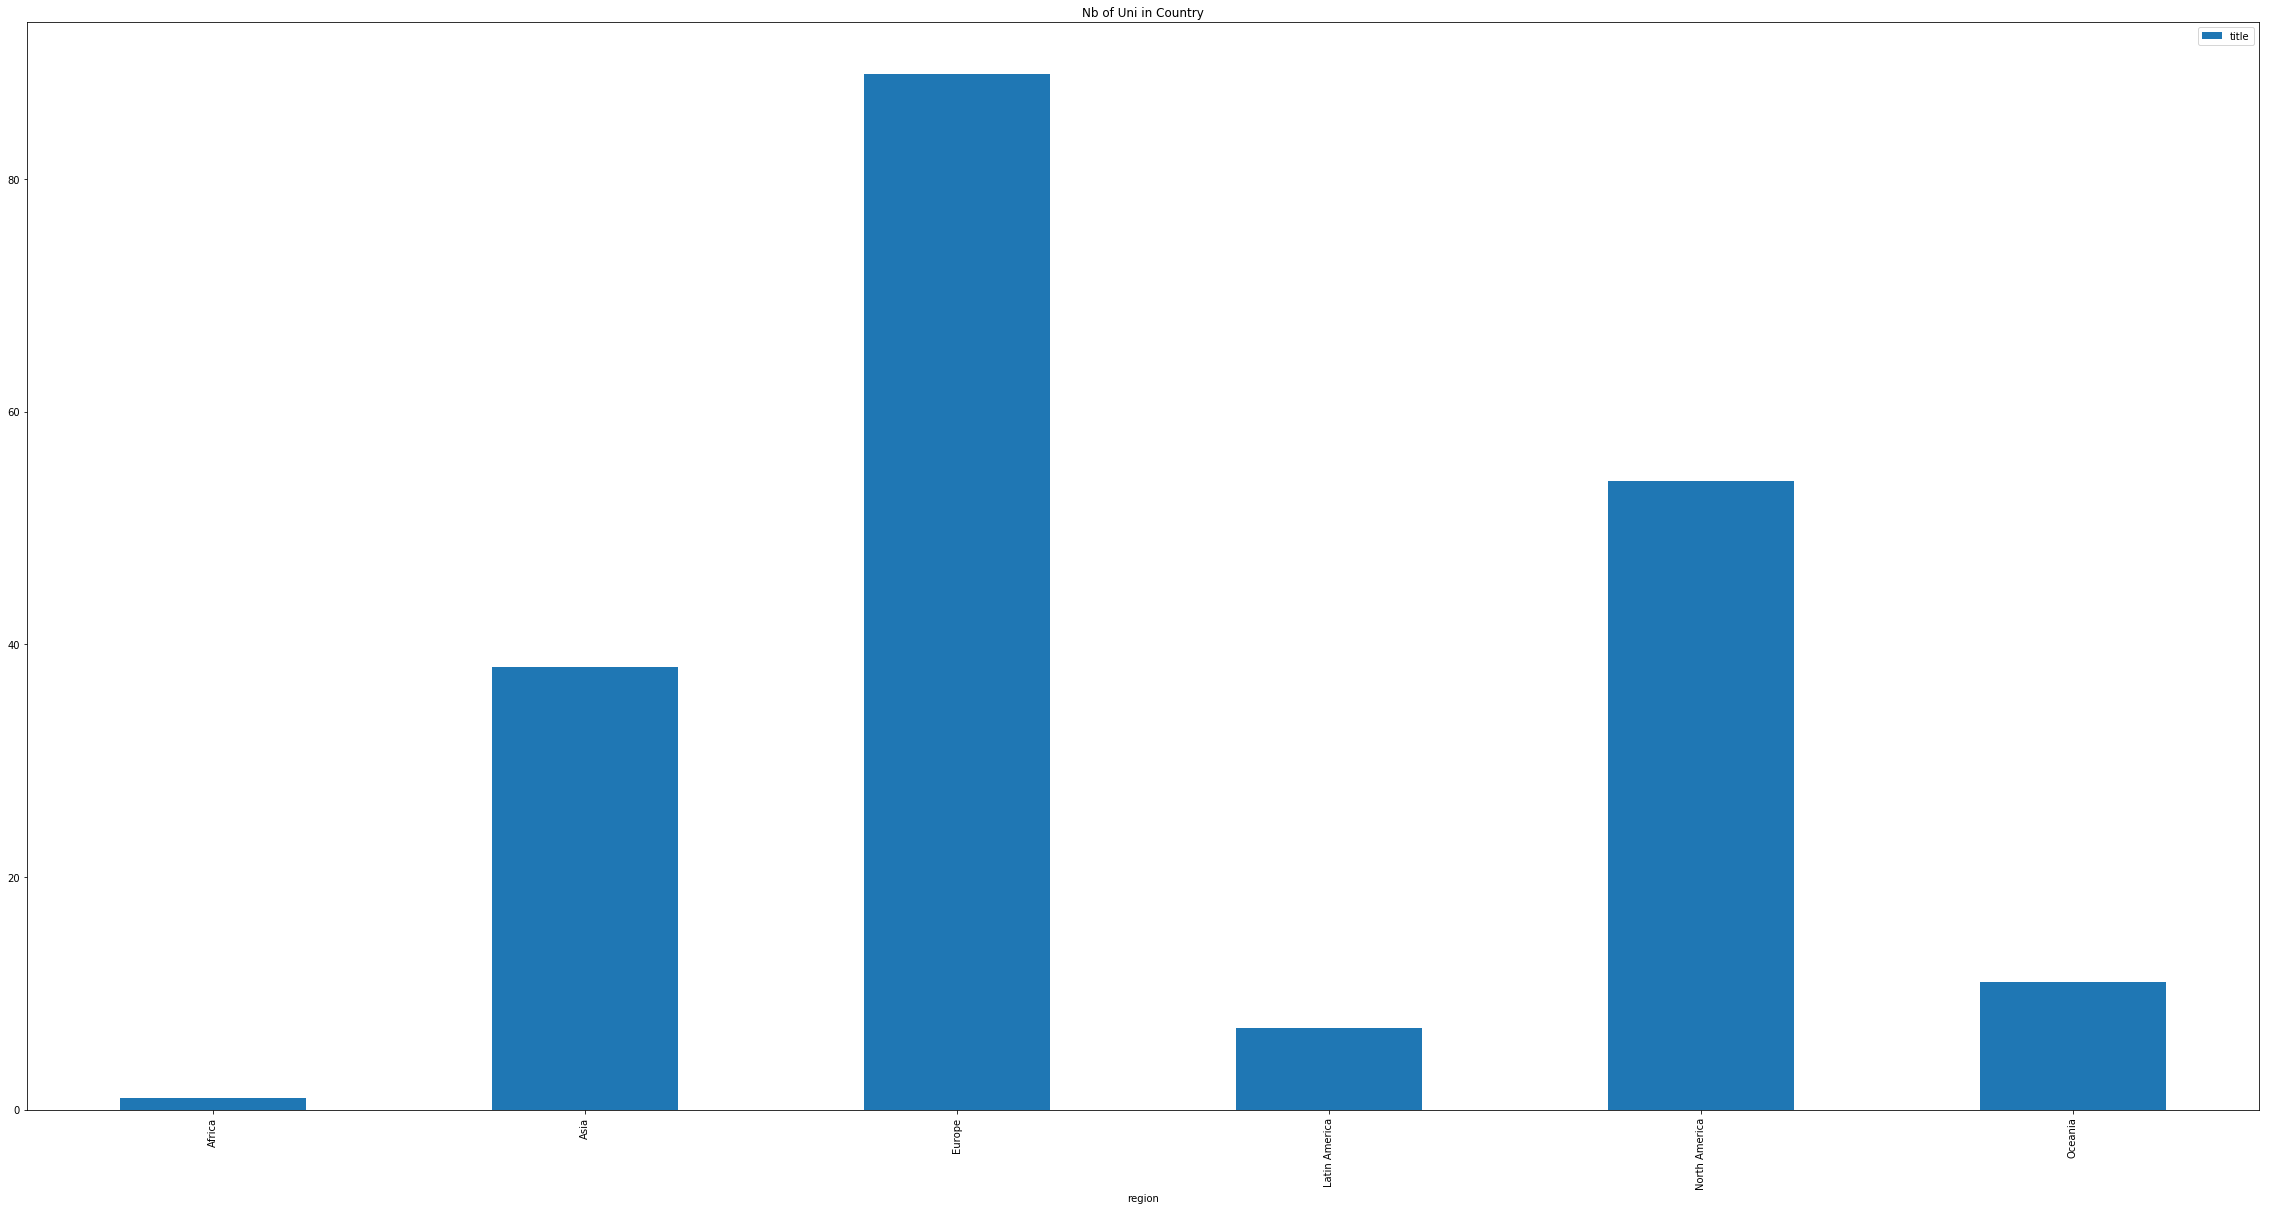

In [47]:
# Here we take only the region and the title and count the number of Univertity that are in each region

df_region_nb_uni = region_df.reset_index()
df_region_nb_uni =df_region_nb_uni[["region", "title"]]
df_region_nb_uni = df_region_nb_uni.groupby(['region']).count()
df_region_nb_uni.plot(kind = 'bar', title ="Nb of Uni in Country", figsize=(40,20));

As we expected, the top 200 University are in Europe and North America. Maybe this ranking is done with a selection criterion in these countries. This is maybe why there are in the top ranking of these data

### Task 2.0 Retrieve the Data

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Using the same technique used the first part of this homework (using postman), we get the URL to a json that contains the wanted data:

In [48]:
request_url2 = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r2 = requests.get(request_url2)

In [49]:
univ_vals2 = r2.json()['data']
univ_vals2[0]

{'aliases': 'University of Oxford',
 'location': 'United Kingdom',
 'member_level': '0',
 'name': 'University of Oxford',
 'nid': 468,
 'rank': '1',
 'rank_order': '10',
 'record_type': 'master_account',
 'scores_citations': '99.1',
 'scores_citations_rank': '15',
 'scores_industry_income': '63.7',
 'scores_industry_income_rank': '169',
 'scores_international_outlook': '95.0',
 'scores_international_outlook_rank': '24',
 'scores_overall': '94.3',
 'scores_overall_rank': '10',
 'scores_research': '99.5',
 'scores_research_rank': '1',
 'scores_teaching': '86.7',
 'scores_teaching_rank': '5',
 'stats_female_male_ratio': '46 : 54',
 'stats_number_students': '20,409',
 'stats_pc_intl_students': '38%',
 'stats_student_staff_ratio': '11.2',
 'subjects_offered': 'Archaeology,Art, Performing Arts & Design,Biological Sciences,Business & Management,Chemical Engineering,Chemistry,Civil Engineering,Computer Science,Economics & Econometrics,Electrical & Electronic Engineering,General Engineering,Geo

The json looks to have most of the needed information, the parsing will be earsier

### Task 2.0.1 Clear rank and drop data not needed

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Dropping all the lines that we don't need for this analysis

In [50]:
univ_df2 = pd.DataFrame(univ_vals2)
univ_dr_df2 = univ_df2.drop('aliases', 1).drop('member_level', 1).drop('rank_order', 1).drop('record_type', 1) \
.drop('scores_citations', 1).drop('scores_research', 1).drop('scores_research_rank', 1).drop('scores_teaching', 1) \
.drop('nid', 1).drop('scores_citations_rank', 1).drop('scores_industry_income', 1).drop('scores_industry_income_rank', 1) \
.drop('scores_overall_rank', 1).drop('scores_international_outlook', 1).drop('scores_international_outlook_rank', 1) \
.drop('scores_overall', 1).drop('scores_teaching_rank', 1).drop('stats_female_male_ratio', 1) \
.drop('stats_pc_intl_students', 1).drop('subjects_offered', 1).drop('url', 1)
univ_dr_df2.head()

,location,name,rank,stats_number_students,stats_student_staff_ratio
0,United Kingdom,University of Oxford,1,"20,409",11.2
1,United Kingdom,University of Cambridge,2,"18,389",10.9
2,United States,California Institute of Technology,=3,"2,209",6.5
3,United States,Stanford University,=3,"15,845",7.5
4,United States,Massachusetts Institute of Technology,5,"11,177",8.7


Number of entries in our data: 

In [51]:
len(univ_dr_df2.index)

1102

Replace rank by index+1 in case this is an invalid way to do, just ignore this cell

In [52]:
univ_dr_df2['rank'] = univ_dr_df2.index + 1
univ_dr_df2.head()

,location,name,rank,stats_number_students,stats_student_staff_ratio
0,United Kingdom,University of Oxford,1,"20,409",11.2
1,United Kingdom,University of Cambridge,2,"18,389",10.9
2,United States,California Institute of Technology,3,"2,209",6.5
3,United States,Stanford University,4,"15,845",7.5
4,United States,Massachusetts Institute of Technology,5,"11,177",8.7


### Task 2.0.2 Prepare url and test soup for missing data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Prepare urls for request-loop

In [53]:
u_urls2 = np.array(univ_df2[['url']].values)
univ_urls2 = []
main_url2 = 'http://www.timeshighereducation.com'
for url_ in u_urls2:
    url = url_[0]
    univ_urls2.append(main_url2 + url + '#wurs')
univ_urls2[:5]

['http://www.timeshighereducation.com/world-university-rankings/university-oxford#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/university-cambridge#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/california-institute-technology#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/stanford-university#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/massachusetts-institute-technology#wurs']

Retrieve the soup for the Oxford description page

In [54]:
url_oxford = 'http://www.timeshighereducation.com/world-university-rankings/university-oxford#wurs'
r_oxford = requests.get(url_oxford)
soup_oxford = BeautifulSoup(r_oxford.text, 'html.parser')
soup_oxford.prettify()[:200]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html dir="ltr" lang="en" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/'

Test if we get the same value using both methods with an entry for which we have all the values

In [55]:
oxford_values = soup_oxford.find('div', class_='panel-pane pane-data-stats') \
.find('div', class_='pane-content').findAll('div')
div_idx = 0
for i_div in range(0, len(oxford_values)):
    curr_div = oxford_values[i_div]
    if(curr_div.text == 'keystats pc_intl_students'):
        div_idx = i_div
int(oxford_values[div_idx].find('div', class_='value').text[:2])/100

0.38

In [56]:
int(oxford_values[0].text[:2])/100

0.38

### Task 2.0.3 Prepare to retrieve data and callback funciton

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Same methods as the one used for the first website

In [57]:
def retrieve_div_value(soup, div_name):
    parent = soup.find('div', class_='panel-pane pane-data-stats')
    if parent is None: 
        return 'failed'
    child = parent.find('div', class_='pane-content')
    if child is None:
        return 'failed'
    values = child.findAll('div')
    if values is None:
        return 'failed'
    div_idx = 0
    last_text = ''
    for i_div in range(0, len(values)):
        curr_div = values[i_div]
        if(curr_div.text == div_name):
            return int(last_text[:len(last_text)-1])/100
        last_text = curr_div.text
    return 'failed'

In [58]:
retrieve_div_value(soup_oxford, 'Percentage of International Students')

0.38

In [59]:
#declare globals for second methods
international_st2 = []
num_request2 = 1102 # We load all the data so but use only 200 (so if we need more data we already have them)
bad_soups2 = []
futures2 = []
count2 = 0
fac2 = []

In [60]:
#helper to reset globals
def reset_arrays2():
    global international_st2
    global count2
    global bad_soups2
    
    international_st2 = []
    bad_soups2 = []
    count2 = 0
    return 0

In [61]:
#proceeds request when completed in background:
# extract soup, extract values
def callback2(future):
    r = future.result()
    soup = BeautifulSoup(r.text, 'html.parser')
    
    global international_st2
    global num_request2
    global count2
    global bad_soups2
    
    count2 = count2 + 1
    if count2 > num_request2:
        international_st2 = []
        count2 = 0
    
    inter_st = retrieve_div_value(soup, 'Percentage of International Students')
        
    if inter_st == 'failed':
        bad_soups2.append(soup)
    international_st2.append(inter_st)

### Task 2.0.4 Import Data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [62]:
#initialize session for background threads
from requests_futures.sessions import FuturesSession
session2 = FuturesSession()

In [63]:
#displays a progress bar for the requests in backgrounds
import threading
from IPython.display import display
import ipywidgets as widgets
import time
import sys

def work2(progress2, num_request2):
    global international_st2
    while(len(international_st2) <= num_request2):
        progress2.value = len(international_st2)/num_request2
        
def progress_bar2(num_request2):
    progress2 = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
    
    thread2 = threading.Thread(target=work2, args=(progress2, num_request2,))
    display(progress2)
    thread2.start()

In [64]:
#initiate background requests. The number of requests should be customized on the next line

def load_data2(univ_urls2, num_request2):

    url_slice2 = univ_urls2[:num_request2]
    url_last_idx2 = len(url_slice2) - 1
    reset_arrays2()
    for i_url, url in enumerate(url_slice2):
        # On fait notre requête GET
        future2 = session.get(url)
        # On rajoute le callback à appeler quand
        # le résultat de la requête arrive.
        if i_url != url_last_idx2:
            futures2.append(future2)
        future2.add_done_callback(callback2)
        if i_url == (url_last_idx2):
            future2.add_done_callback(play_sound_futur)

In [65]:
# here we have the nb of request that we want to load
# if you delete the file you can see the progress bar to see the loading of the second data
#if you don't have the file save2.p it loads the data otherwise we take the data from save2.p

progress_bar2(num_request2)

try:
    data2 = pickle.load(open("save2.p", "rb"))
    international_st2 = data2[0]
    num_request_file2 = data2[1]
    
    print(num_request_file2)
    
    if(num_request_file2 != num_request2):
        play_sound('Slurp.wav')
        load_data2(univ_urls2, num_request2)
    else:
        play_sound('smb_1-up.wav')
        
except (OSError, IOError) as e:
    load_data2(univ_urls2, num_request2)

A Jupyter Widget

1102


In [66]:
len(international_st2) # to be sure that all is loaded

1102

In [67]:
len(bad_soups2) # =0 otherwise some data weren't download

0

### Task 2.0.5 Kill data second file

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [68]:
# attempts to kill waiting requests: if attempt is successful, bar doesn't move. Goal is to cancel all but last requests
# in order to instantly play sound and complete only one request
    
def reset_futures2():
    global futures2 
    for fu in futures2:
        # cancel request on this url
        fu.cancel()
        #print("dead")
    futures2 = []    
    return 0

#Last try it seemed to work. We reset arrays twice since the canceling of
#asynchronous requests is asynchronous, the reset might happen before all requests are canceled
#and some requests might finish in the meantime (after reset)
;

''

In [69]:
#bad_soups contains all the soups from which we were unable to scrap data. 
#After requests are finished, the block should compile to 0
len(bad_soups2)

0

### Task 2.0.6 Store data and continue compilation

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [70]:
# this is to store the data if we don't have the file save.p and reset the futurs after loading

def store_data2():
    global international_st2
    global num_request2
    
    data = [international_st2, num_request2]
    pickle.dump(data, open("save2.p", "wb"))
    reset_futures2()
    
    
# you can delete the file but you have to uncomment this part to save the data in the file

#store_data2() # decoment here after the Zelda sound and recomment don't need to store data everytime

In [71]:
#construct dataframe from individual pages'info
missing_df2 = pd.DataFrame(data= [international_st2],index = ['inter_st_ratio']).transpose()
missing_df2.head()

,inter_st_ratio
0,0.38
1,0.35
2,0.27
3,0.22
4,0.26


merge the two daframes to have all infos needed and parse the value in numeric:

In [72]:
univ_tot_df2 = pd.concat([univ_dr_df2, missing_df2], axis = 1)
# we take only the 200 fisrt (but already have the data for everyone)
univ_tot_df2 = univ_tot_df2[:200]
univ_rk_df2 = univ_tot_df2.set_index(['rank'])
univ_rk_df2[['stats_number_students']] = univ_rk_df2[['stats_number_students']].applymap(lambda x: x.replace(',',''))
univ_rk_df2['stats_number_students'] = pd.to_numeric(univ_rk_df2['stats_number_students'])
univ_rk_df2['stats_student_staff_ratio'] = pd.to_numeric(univ_rk_df2['stats_student_staff_ratio'])
univ_tot_df2 = univ_rk_df2.reset_index()
univ_tot_df2.head()

,rank,location,name,stats_number_students,stats_student_staff_ratio,inter_st_ratio
0,1,United Kingdom,University of Oxford,20409,11.2,0.38
1,2,United Kingdom,University of Cambridge,18389,10.9,0.35
2,3,United States,California Institute of Technology,2209,6.5,0.27
3,4,United States,Stanford University,15845,7.5,0.22
4,5,United States,Massachusetts Institute of Technology,11177,8.7,0.26


For the regions, we have a problem because they are neither given in the data and neither in the url. 
So we think that it's better to add a col and take the ragion from the first url www.topuniversities.com,
if they exist

### Task 2.1

Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?, (c) country, (d) region

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [73]:
#Same function for Task 1.1 to retreive and form the Dataframe that we need
def sortby_col_rank2(df, col):
    univ_col = df.set_index([col, 'rank'])
    univ_col.sort_index(level=[col, 'rank'], ascending=[1, 1], inplace=True)
    return univ_col

(a) ratio between faculty members and students

In [74]:
ratio_mem_stu2 = univ_tot_df2.sort_values(['stats_student_staff_ratio'], ascending = 0)
ratio_mem_stu2.head()

,rank,location,name,stats_number_students,stats_student_staff_ratio,inter_st_ratio
99,100,Germany,University of Bonn,35619,77.9,0.13
124,125,Germany,University of Mannheim,10995,74.5,0.16
91,92,Germany,Technical University of Berlin,22390,64.3,0.20
163,164,Germany,University of Erlangen-Nuremberg,38730,58.5,0.12
78,79,Germany,RWTH Aachen University,43721,57.7,0.18


(b) ratio of international students?

In [75]:
ratio_int2 = univ_tot_df2.sort_values(['inter_st_ratio'], ascending = 0)
ratio_int2.head()

,rank,location,name,stats_number_students,stats_student_staff_ratio,inter_st_ratio
24,25,United Kingdom,London School of Economics and Political Science,10065,12.2,0.71
178,179,Luxembourg,University of Luxembourg,4969,14.6,0.57
38,39,Sweden,Karolinska Institute,7424,10.9,0.55
7,8,United Kingdom,Imperial College London,15857,11.4,0.55
102,103,Netherlands,Maastricht University,16727,18.0,0.50


(c) country

In [76]:
country_df2 = sortby_col_rank2(univ_tot_df2, 'location')
country_df2.head()

name  stats_number_students  \
location  rank                                                          
Australia 32           University of Melbourne                  42116   
          48    Australian National University                  15986   
          61              University of Sydney                  44553   
          65          University of Queensland                  38968   
          81                 Monash University                  46846   

                stats_student_staff_ratio  inter_st_ratio  
location  rank                                             
Australia 32                         26.6            0.40  
          48                         19.3            0.35  
          61                         21.6            0.32  
          65                         35.7            0.26  
          81                         33.7            0.28

(d) region

In [77]:
# We saw that we don't have the region. So we will first do the 3.1 (Merging) and then do this question juste after:
# If you want to see it directly click ok the link on the bottom

<p>
<div class="lev1"><a href="#Task-2.1.d-Region"><span class="toc-item-num">Task 2.1.d&nbsp;&nbsp;</span> Region</a></div>
 
</p>

### Task 2.2 Plots

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

(a) Plot ratio between faculty members and students

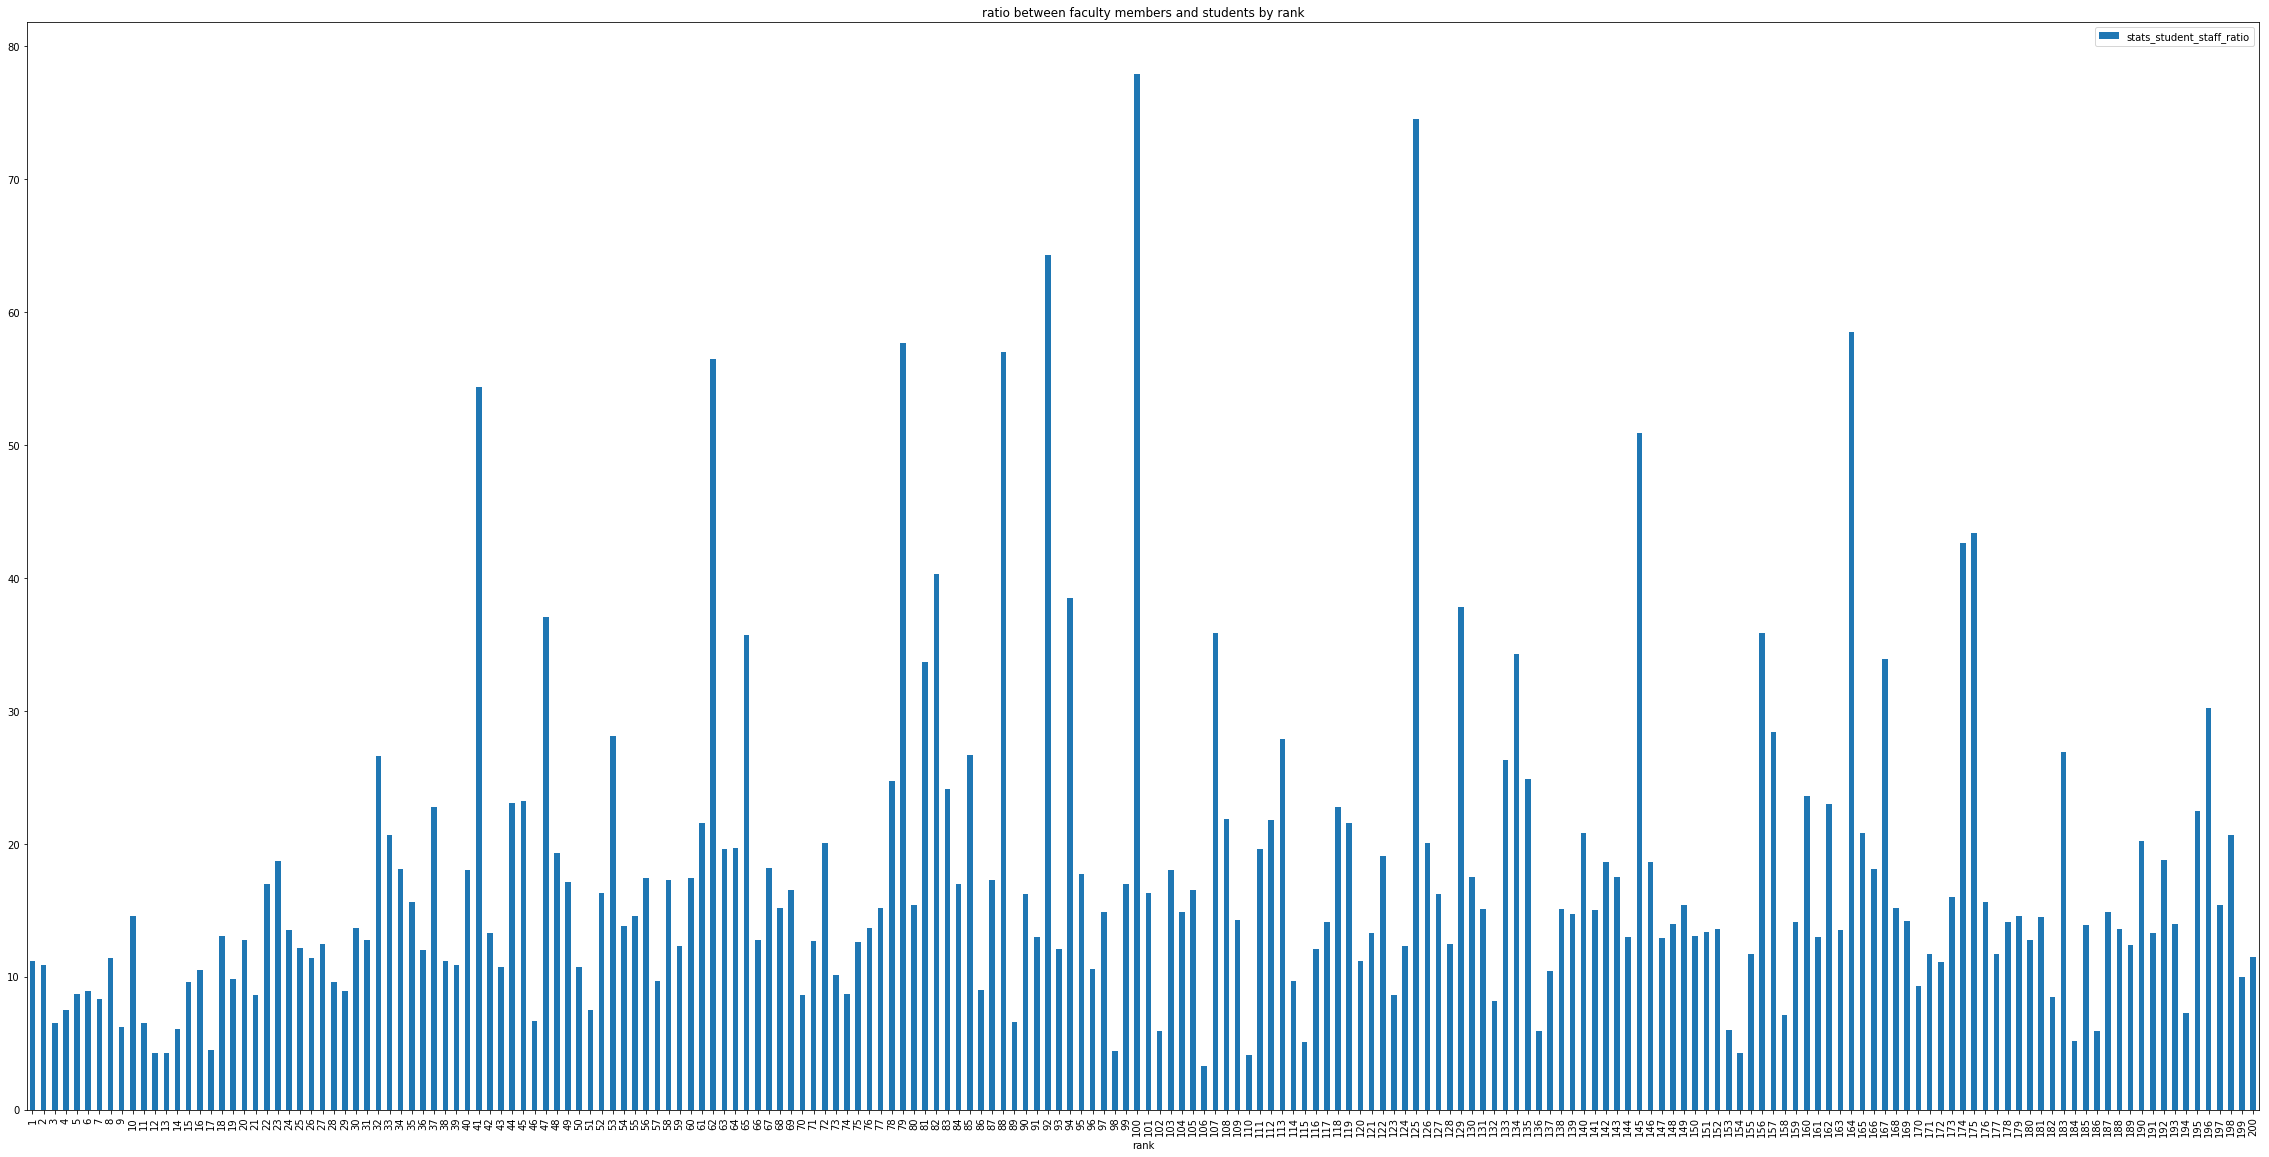

In [78]:
# We only take the rank and the ratio (stats_student_staff_ratio) that we need. We sort the rank and plot the result

df_rank_mem_stu2 = ratio_mem_stu2[["rank", "stats_student_staff_ratio"]]
df_rank_mem_stu2 = df_rank_mem_stu2.set_index("rank")
df_rank_mem_stu2 = df_rank_mem_stu2.sort_index()
df_rank_mem_stu2.plot(kind = 'bar', title ="ratio between faculty members and students by rank", figsize=(40,20));

We can see that the first Universities have a here a small ratio between faculty members and students. This is the opposite as the first data. It seems to tell that if a University have a small ratio, the rank will be better in the international ranking 

(b) Plot ratio of international students

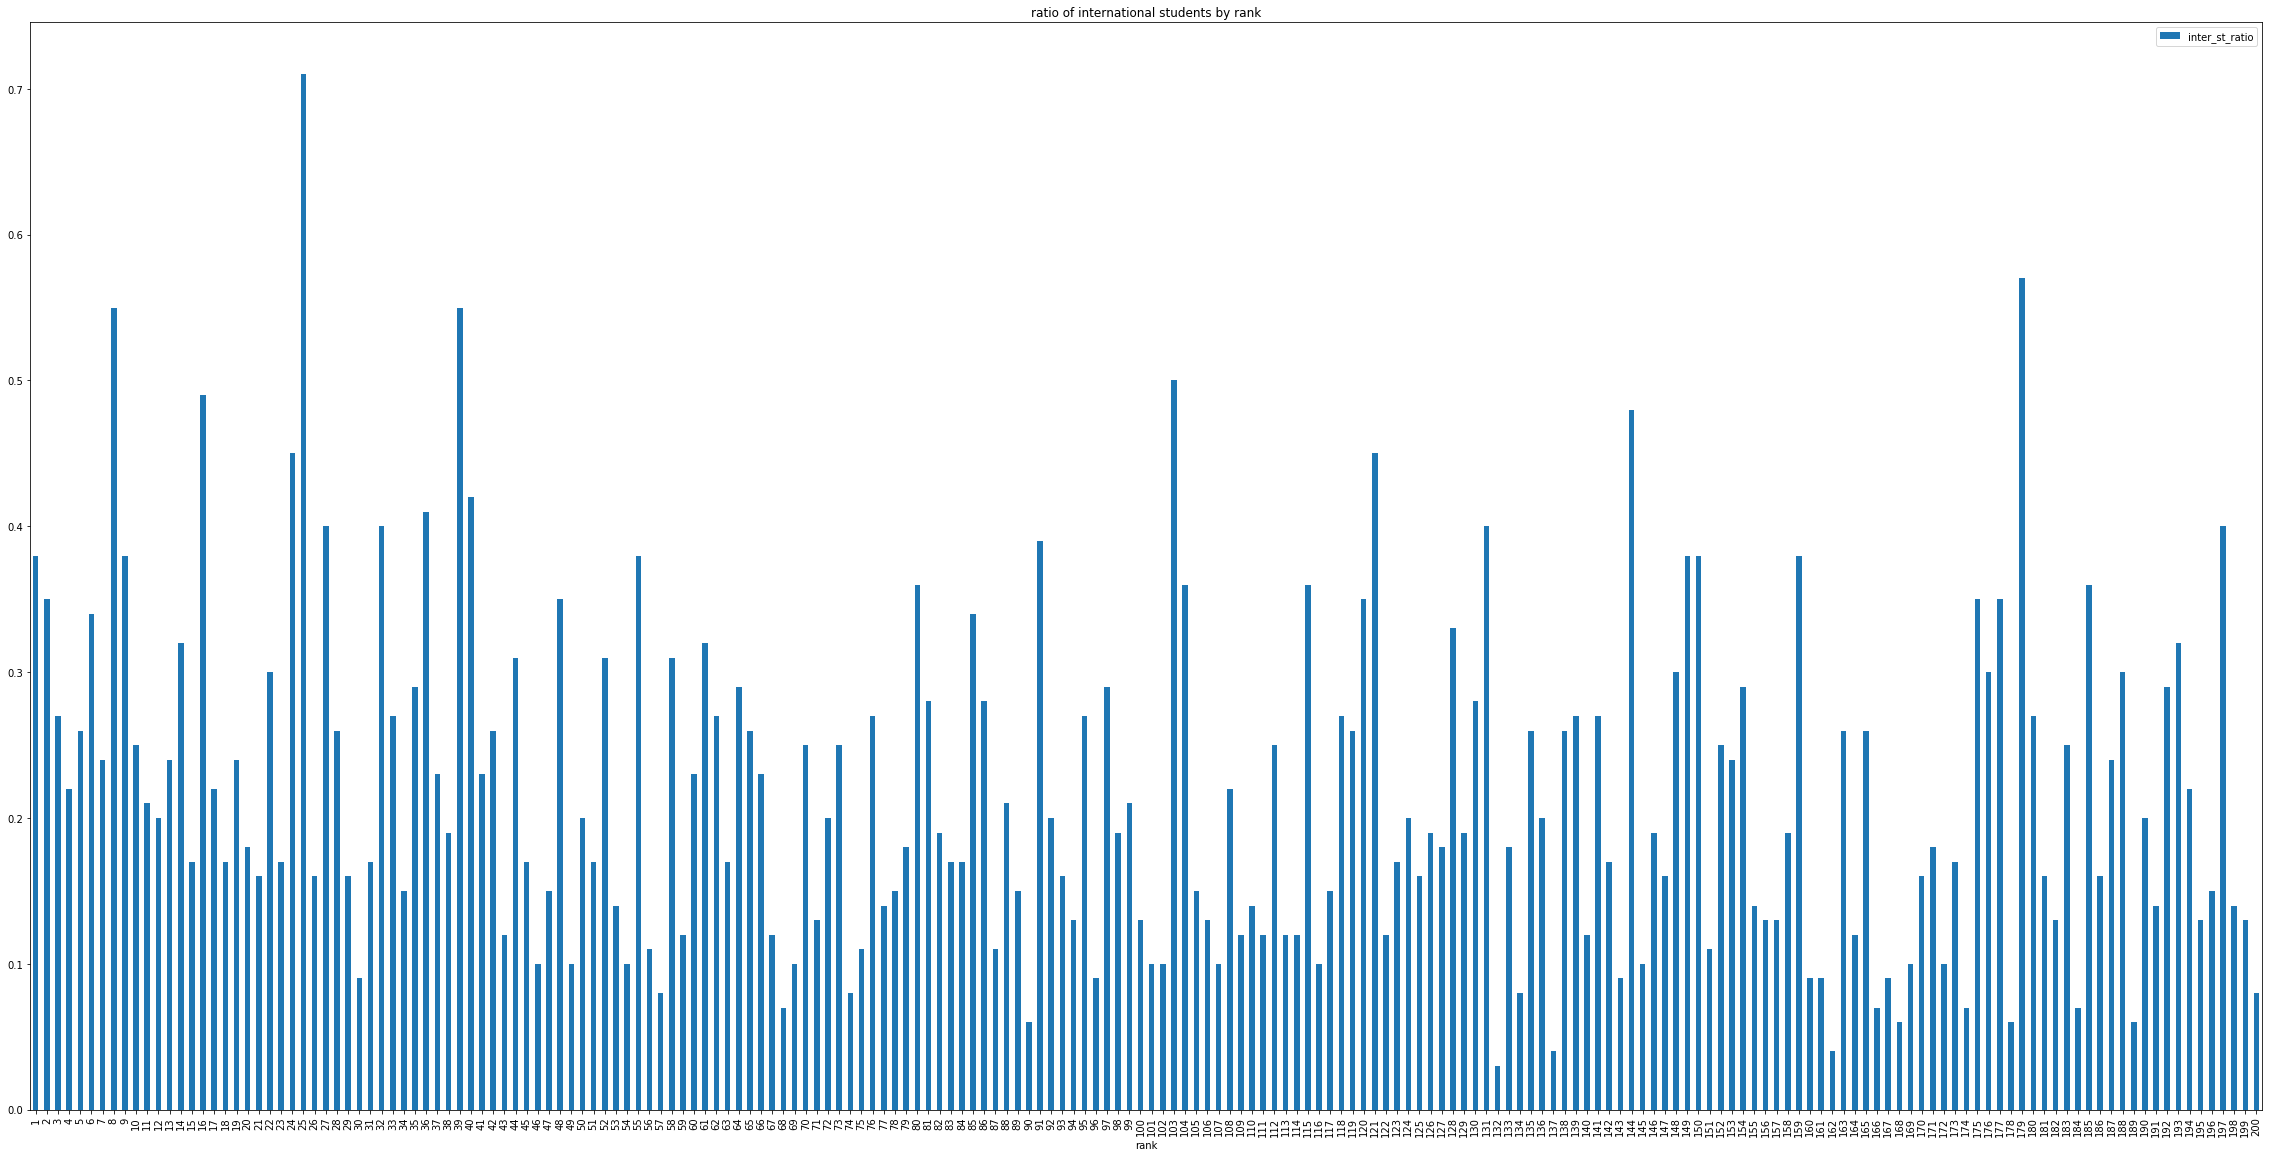

In [79]:
# Same as before, we only take the rank and the ratio (inter_st_ratio) that we need. We sort the rank and plot the result

df_rank_int_stu2 = ratio_int2[["rank", "inter_st_ratio"]]
df_rank_int_stu2 = df_rank_int_stu2.set_index("rank")
df_rank_int_stu2 = df_rank_int_stu2.sort_index()
df_rank_int_stu2.plot(kind = 'bar', title ="ratio of international students by rank", figsize=(40,20));

The ratio of international student seems to have a very small inpact in the ranking like the previous data. The best University have a small amount of international student but the some university with a big ratio have a good rank too. So it seems to have a little correlation but not as much as the ratio of faculty member and students

c) Plot Number of University in Country

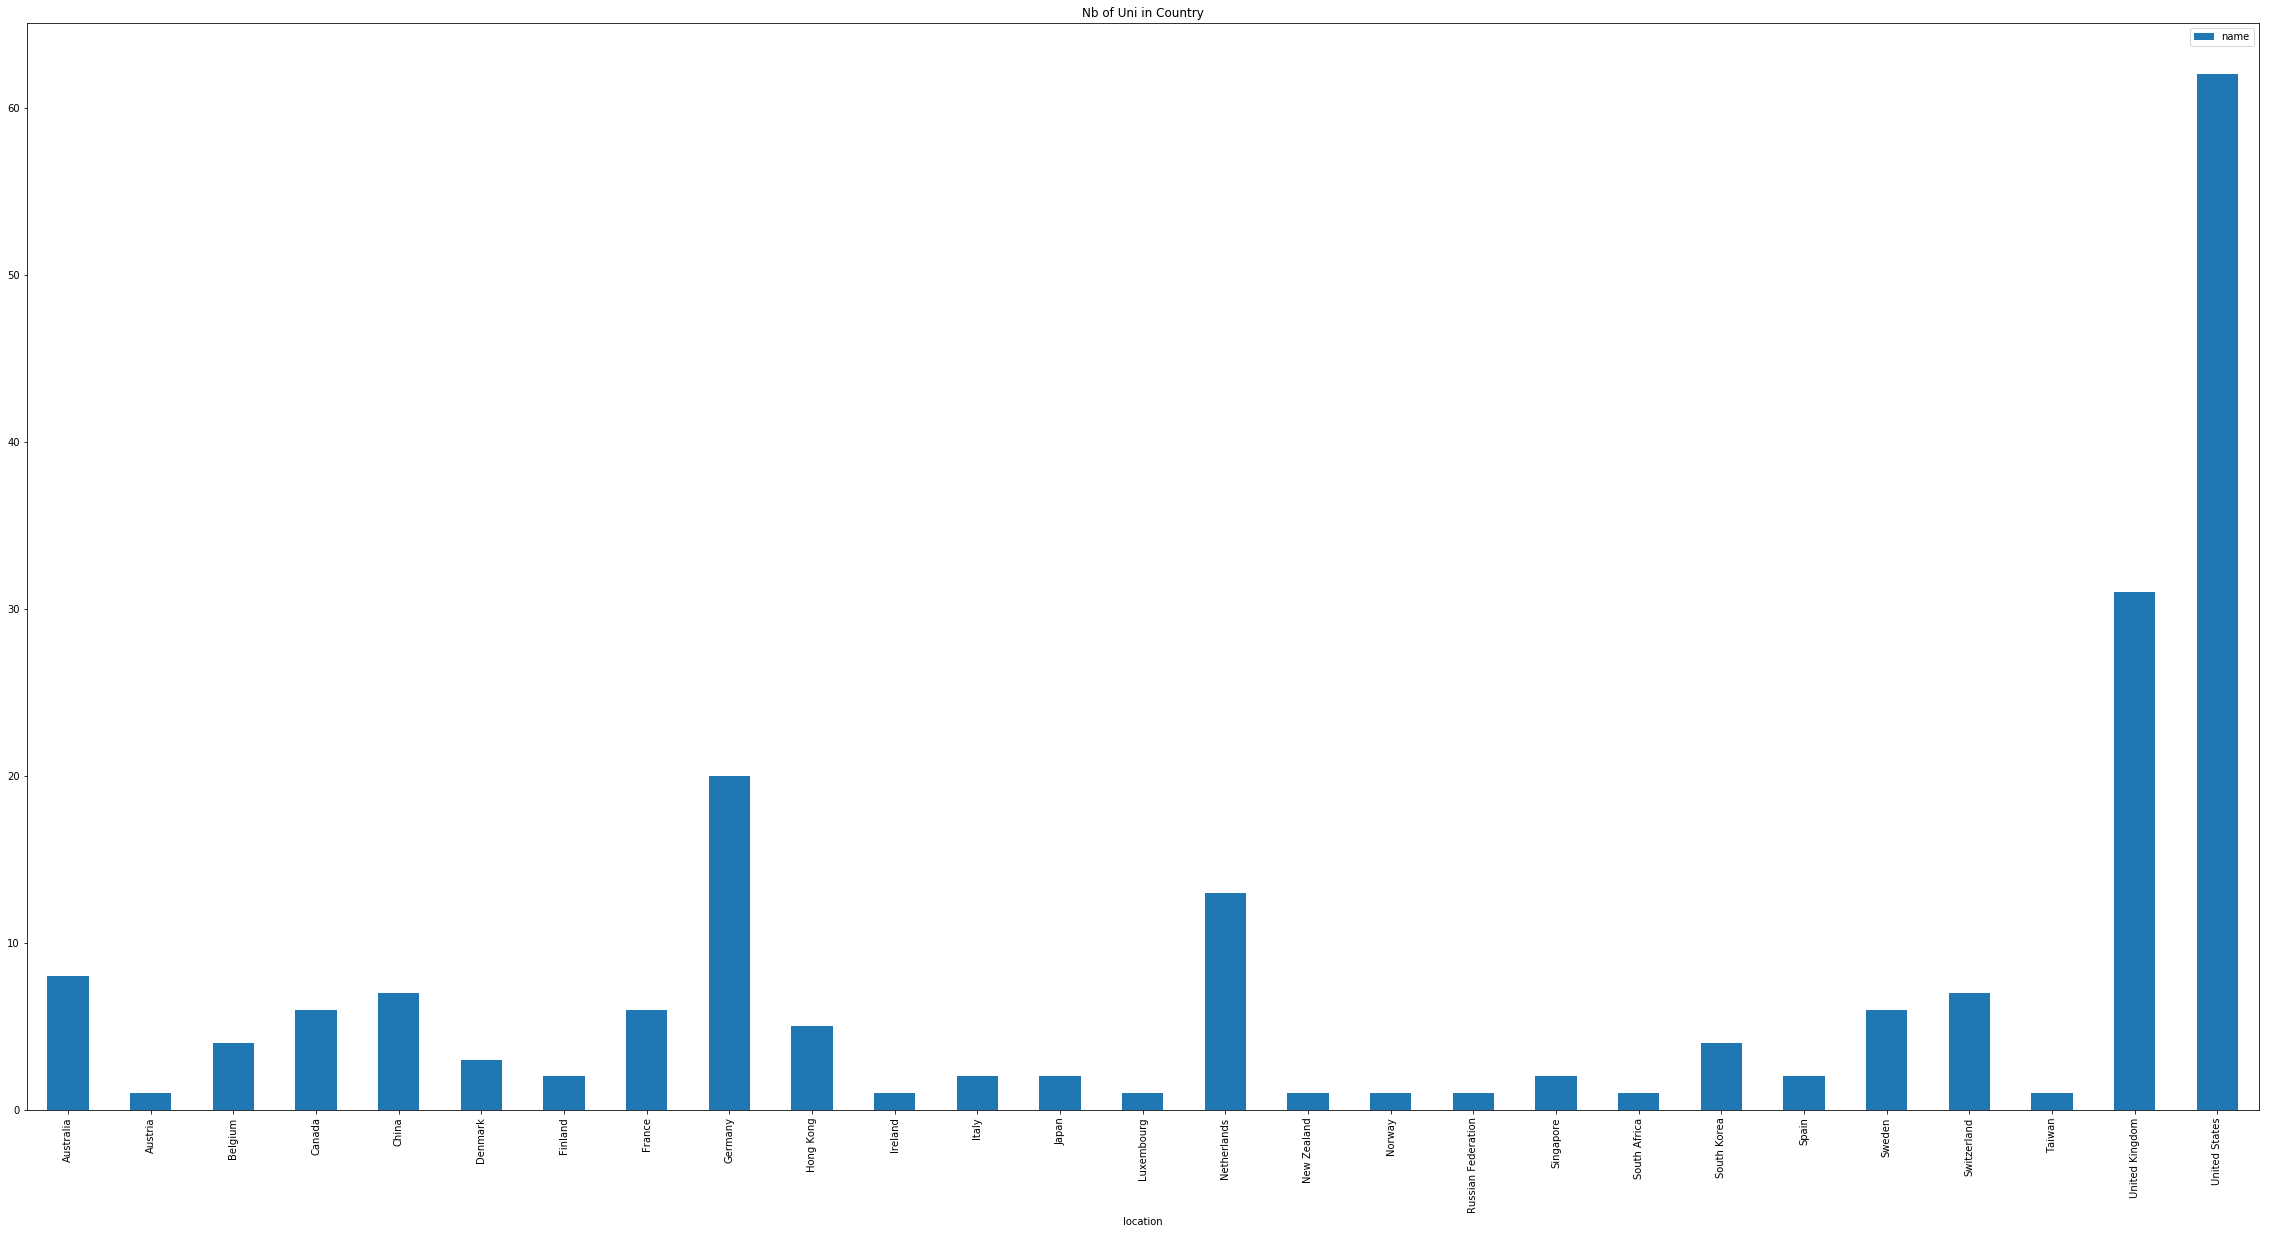

In [80]:
df_country_nb_uni2 = country_df2.reset_index()
df_country_nb_uni2 = df_country_nb_uni2[["location", "name"]]
df_country_nb_uni2 = df_country_nb_uni2.groupby(['location']).count()
df_country_nb_uni2.plot(kind = 'bar', title ="Nb of Uni in Country", figsize=(40,20));

We can see that the top 200 University are in United Kingdom ans USA. But maybe the region will give more details like the previous data but we can see that many Universities come from Europe too

d) Plot Number of University in Country

In [81]:
# We need to merge first so this question will come after the merge and after the 2.1 d) Plot Region
# click on the link to go directly

<p>
<div class="lev1"><a href="#Task-2.2.d-Plot-Region"><span class="toc-item-num">Task 2.2.d&nbsp;&nbsp;</span> Plot Number of University in Country</a></div>
 
</p>

### Task 3.0 Prepare for merge

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

First we will clean a little bit the data. We can see that in the different data, the fields title and name are not always the same. So to clean the data, we will delete every parentheses in every fields to have the same name.
However it's not sufficient and that's why we add a function that will compare every name and see determine with a threshold if it's the same name of not.

In [82]:
# This function is for the merge. We will compare every name and determine if there are the same or not

import difflib

threshold = 0.5

def fuzzyBool(title, name):
    title_univ = title
    name_univ = name
    
    # many name and title have university in it so we delet these part to have a better match
    
    if "University" in title_univ: 
        title_univ = title_univ.replace("University","")
        
    if "University" in name_univ: 
        name_univ = name_univ.replace("University","")
        
    word_ratio = difflib.SequenceMatcher(None, a= title_univ.lower(), b= name_univ.lower()).ratio()
    
    if(word_ratio >= threshold):
            # sinon donne taiwan avec 0.4
        return name
    else: 
        return title

In [83]:
df_pre_merge = univ_tot_df.copy()
df_pre_merge2 = univ_tot_df2.copy()
# We delete everything in parentheses

df_pre_merge['title'] = df_pre_merge['title'].str.replace(r"\(.*\)","")
df_pre_merge2['name'] = df_pre_merge2['name'].str.replace(r"\(.*\)","")

df_pre_merge.head()

,country,rank_display,region,title,inter_st,students,inter_fac,fac
0,United States,1,North America,Massachusetts Institute of Technology,3717,11067,1679,2982
1,United States,2,North America,Stanford University,3611,15878,2042,4285
2,United States,3,North America,Harvard University,5266,22429,1311,4350
3,United States,4,North America,California Institute of Technology,647,2255,350,953
4,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490


In [84]:
# lokk only on title and name

title = df_pre_merge['title']
new_title = df_pre_merge['title'].copy()
name = df_pre_merge2['name']

# we loop on every title and name to compare them and have a match

for idx_title, title_ in enumerate(title):
    for idx_name, name_ in enumerate(name):        
        new_title[idx_title] = fuzzyBool(title_, name_)
        

In [85]:
# add the new title to the first data (only need to do this to 1 data (have the same name of the second))

df_pre_merge['title'] = new_title
df_pre_merge.head()

,country,rank_display,region,title,inter_st,students,inter_fac,fac
0,United States,1,North America,Massachusetts Institute of Technology,3717,11067,1679,2982
1,United States,2,North America,Stanford University,3611,15878,2042,4285
2,United States,3,North America,Harvard University,5266,22429,1311,4350
3,United States,4,North America,California Institute of Technology,647,2255,350,953
4,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490


In [86]:
# rename the columns to merge
df_pre_merge.columns = ['country1', 'rank1', 'region1', 'name', 'inter_st1', 'students1', 'inter_fac1', 'fac1']
df_pre_merge2.columns = ['rank2', 'country2', 'name', 'students2', 'stu_fac_ratio2', 'inter_st_ratio']
df_pre_merge.head()

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1
0,United States,1,North America,Massachusetts Institute of Technology,3717,11067,1679,2982
1,United States,2,North America,Stanford University,3611,15878,2042,4285
2,United States,3,North America,Harvard University,5266,22429,1311,4350
3,United States,4,North America,California Institute of Technology,647,2255,350,953
4,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490


### Task 3.1 Merge

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [87]:
# Here we merge and keep only the values that are in both data (inner)

df_merged = df_pre_merge.merge(df_pre_merge2, how='inner', on = 'name')
new_column_order = ['name', 'region1', 'rank1', 'rank2', 'country1', 'students1', 'inter_st1', 'fac1', 'inter_fac1',
                   'stu_fac_ratio2', 'inter_st_ratio']
df_merged2 = df_merged.drop('country2', axis=1).drop('students2', axis=1)
df_merged2.reindex(columns = new_column_order)
df_merged2

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55
5,United States,9,North America,University of Chicago,3379,13557,635,2449,9,6.2,0.38
6,United States,13,North America,Princeton University,5411,21904,970,2718,7,8.3,0.24
7,United States,14,North America,Cornell University,1793,8069,246,1007,19,9.8,0.24
8,Singapore,15,Asia,National Taiwan University,2469,12402,1708,4940,200,11.5,0.08
9,South Korea,37,Asia,National Taiwan University,2331,28064,433,3930,200,11.5,0.08


Unfortunately, we have only 108 columns. We tried to change our threshold but by decreasing it, some titles were match to an other University and that's not was we wanted. So we let the best threshold to have 108 matches.
We can see that some Univertity are not in both data and that can explain why we have only 108 matches.

### Task-2.1.d Region

now we can do this task because we finaly have the regions

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [88]:
# we copy the datafram and rename the columns
# As said before, this data didn't had the column region, so we will have less data than before because we needed to merge first the have the regions

region_df2_merged = df_merged.copy()
region_df2_merged.columns = ['country1', 'rank1', 'region1', 'name', 'inter_st1', 'students1', 'inter_fac1', 'fac1', 'rank', 'country', 'students', 'stu_fac_ratio', 'inter_st_ratio']

# We do the same things as before, sort_by the region and rank, dans drop the data we don't need
region_df2_merged = sortby_col_rank2(region_df2_merged, 'region1')
region_df2 = region_df2_merged.drop('country1', axis=1).drop('students1', axis=1).drop('rank1', axis=1) \
.drop('inter_st1', axis=1).drop('inter_fac1', axis=1).drop('fac1', axis=1)

region_df2.head(5)

name       country  students  stu_fac_ratio  \
region1 rank                                                                    
Africa  171    University of Cape Town  South Africa     20775           11.7   
Asia    29           Peking University         China     42136            8.9   
        30         Tsinghua University         China     42089           13.7   
        74            Kyoto University         Japan     22481            8.7   
        111   Sungkyunkwan University    South Korea     24055           19.6   

              inter_st_ratio  
region1 rank                  
Africa  171             0.18  
Asia    29              0.16  
        30              0.09  
        74              0.08  
        111             0.12

### Task-2.2.d Plot Region

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

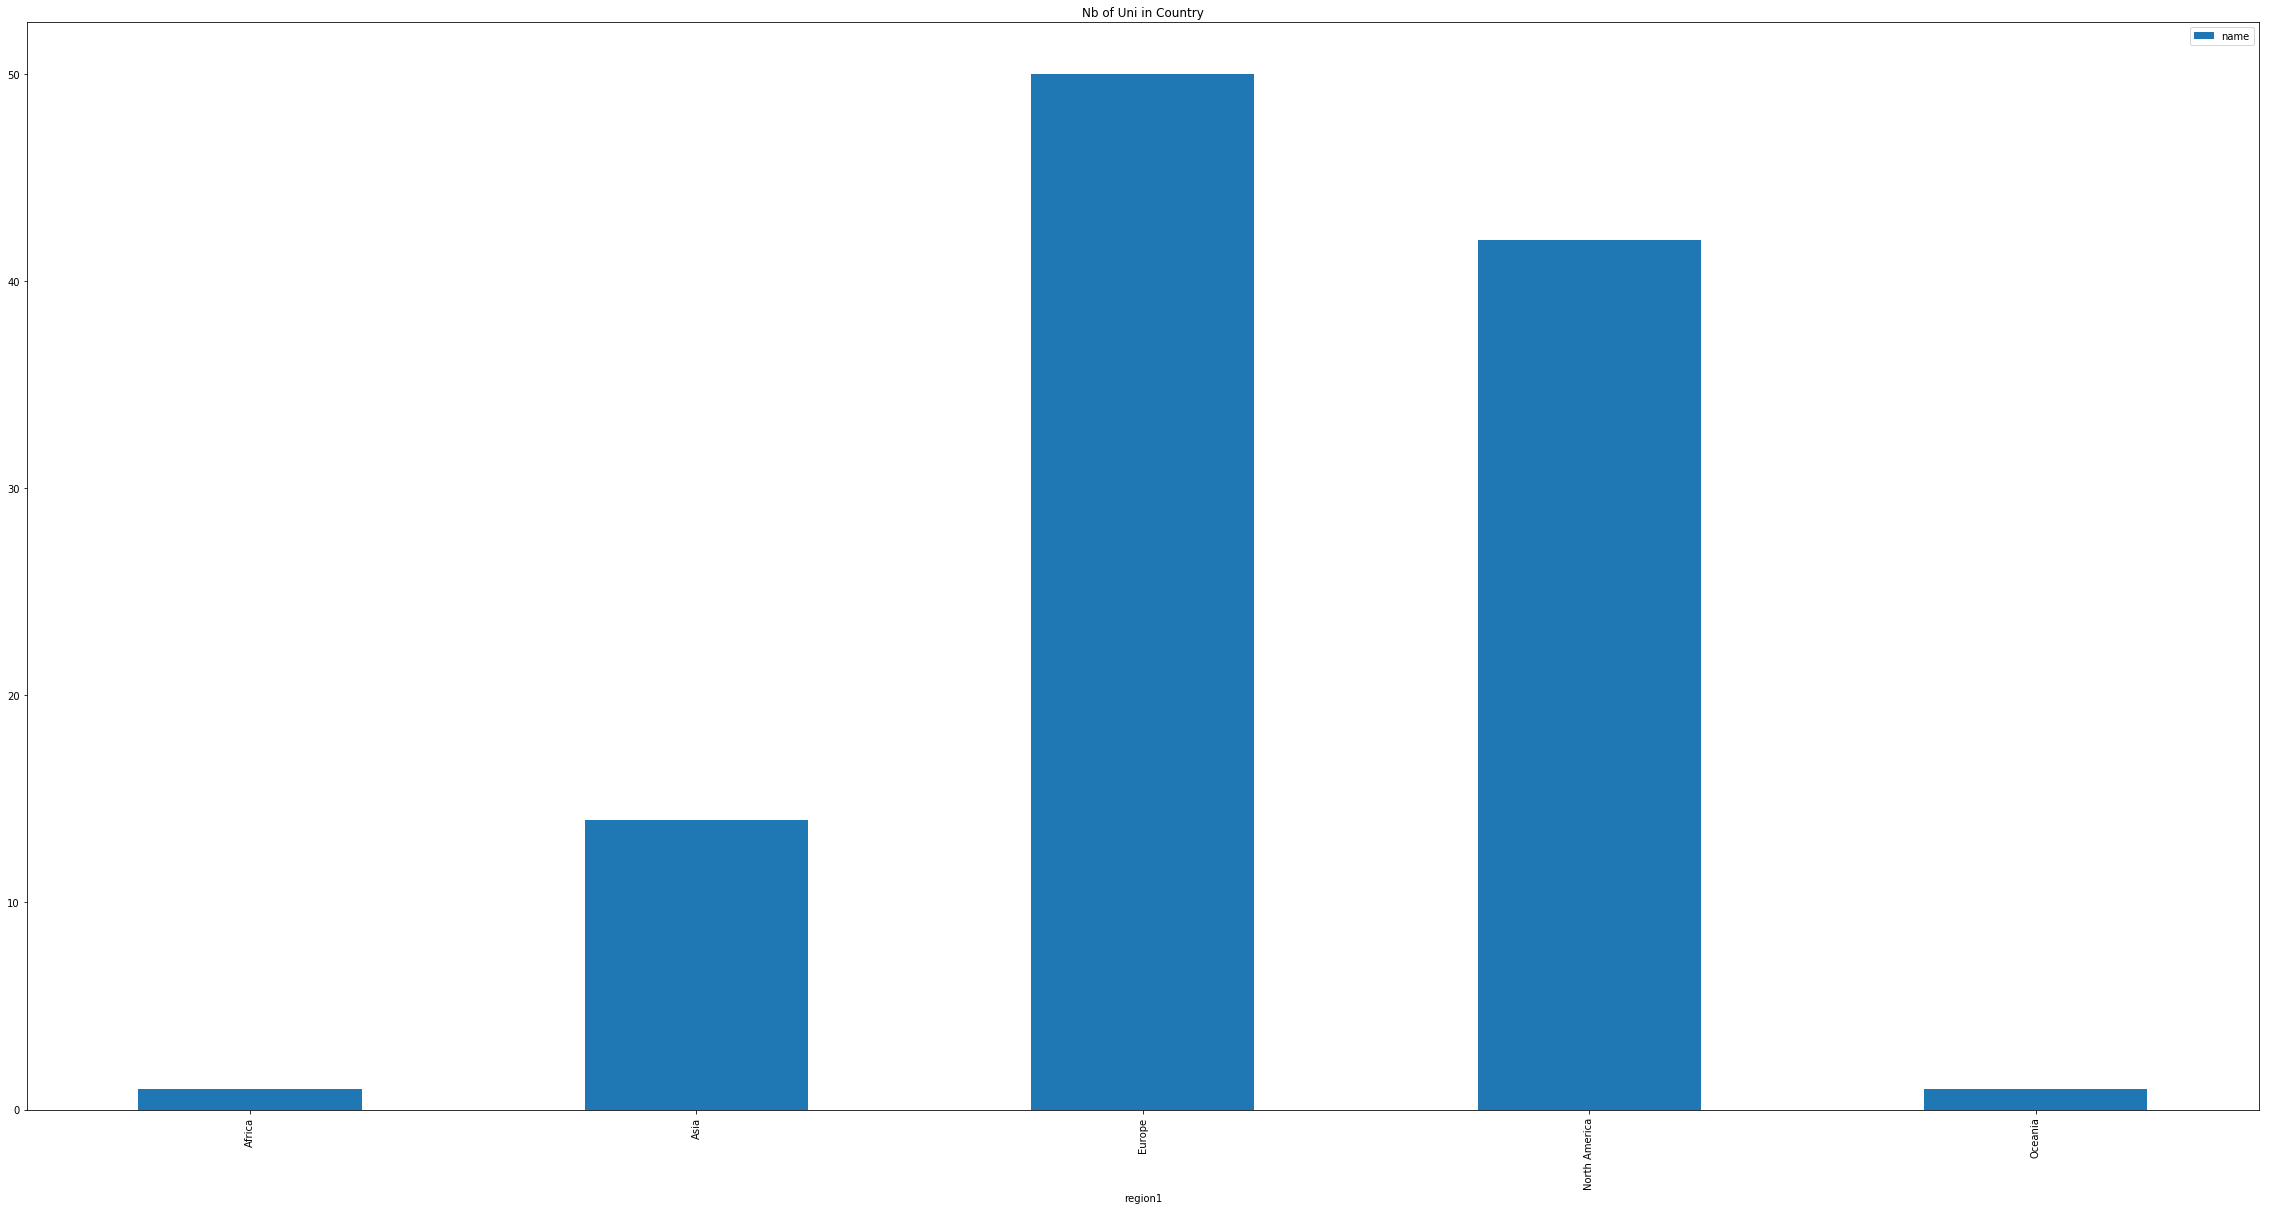

In [89]:
# Here we take only the region and the title and count the number of Univertity that are in each region

df_region_nb_uni2 = region_df2.reset_index()
df_region_nb_uni2 =df_region_nb_uni2[["region1", "name"]]
df_region_nb_uni2 = df_region_nb_uni2.groupby(['region1']).count()
df_region_nb_uni2.plot(kind = 'bar', title ="Nb of Uni in Country", figsize=(40,20));

As we saw in the first data, the top 200 University are in Europe and North America. Maybe our assuption was right or this ranking was again done with a selection criterion in these countries.

Now if we want to return to point 3.0
<p>
<div class="lev1"><a href="#Task-3.0-Prepare-for-merge"><span class="toc-item-num">Task 3.0&nbsp;&nbsp;</span>Prepare for merge</a>
</div>
</p>

### Task 4

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [90]:
df_merged2.head()

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55


In [91]:
df_merged2.dtypes

country1           object
rank1               int64
region1            object
name               object
inter_st1          object
students1          object
inter_fac1         object
fac1               object
rank2               int64
stu_fac_ratio2    float64
inter_st_ratio    float64
dtype: object

In [92]:
# to see if there is some correlation
df_merged2.corr()

,rank1,rank2,stu_fac_ratio2,inter_st_ratio
rank1,1.000000,0.613228,0.215538,-0.129857
rank2,0.613228,1.000000,-0.008709,-0.163311
stu_fac_ratio2,0.215538,-0.008709,1.000000,-0.063031
inter_st_ratio,-0.129857,-0.163311,-0.063031,1.000000


In [93]:
df_mergedTest = df_merged2.copy(deep=True)

In [94]:
# better because some values weren't in numeric

df_mergedTest[['inter_st1','students1','inter_fac1','fac1']] = \
df_mergedTest[['inter_st1','students1','inter_fac1','fac1']].apply(pd.to_numeric,errors='coerce')

In [95]:
df_mergedTest.head()

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55


In [96]:
df_mergedTest.dtypes

country1           object
rank1               int64
region1            object
name               object
inter_st1           int64
students1           int64
inter_fac1          int64
fac1                int64
rank2               int64
stu_fac_ratio2    float64
inter_st_ratio    float64
dtype: object

In [97]:
# Here we can see a better correlation between the values

df_mergedTest.corr()

,rank1,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
rank1,1.000000,-0.228870,-0.085666,-0.494242,-0.427534,0.613228,0.215538,-0.129857
inter_st1,-0.228870,1.000000,0.647380,0.527078,0.402097,-0.353543,0.218857,0.289101
students1,-0.085666,0.647380,1.000000,0.299134,0.579709,-0.246483,0.313265,-0.299817
inter_fac1,-0.494242,0.527078,0.299134,1.000000,0.684560,-0.348188,-0.018223,0.154439
fac1,-0.427534,0.402097,0.579709,0.684560,1.000000,-0.361570,0.048097,-0.172903
rank2,0.613228,-0.353543,-0.246483,-0.348188,-0.361570,1.000000,-0.008709,-0.163311
stu_fac_ratio2,0.215538,0.218857,0.313265,-0.018223,0.048097,-0.008709,1.000000,-0.063031
inter_st_ratio,-0.129857,0.289101,-0.299817,0.154439,-0.172903,-0.163311,-0.063031,1.000000


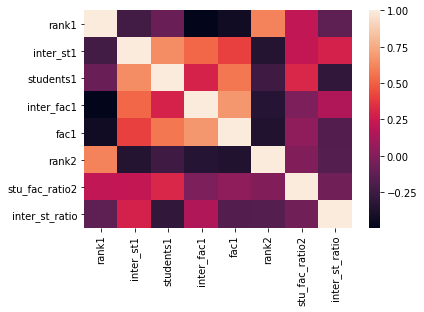

In [98]:
# We can better see with a plot how the correletion is between the values 

sns.heatmap(df_mergedTest.corr())

In [99]:
# the correlation between the internations students and the fac
df_mergedTest.inter_st1.corr(df_mergedTest.inter_fac1)

0.52707807565926068

In [100]:
#the correlation between the international students and the rank1
df_mergedTest.inter_st_ratio.corr(df_mergedTest.rank1)

-0.12985730600536557

In [101]:
#the correlation  between the international students and the rank of the second data
df_mergedTest.inter_st_ratio.corr(df_mergedTest.rank2)

-0.16331117541999565

### Task 5

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [102]:
df_mergedRank = df_mergedTest.copy(deep=True)

In [103]:
df_mergedRank.dtypes

country1           object
rank1               int64
region1            object
name               object
inter_st1           int64
students1           int64
inter_fac1          int64
fac1                int64
rank2               int64
stu_fac_ratio2    float64
inter_st_ratio    float64
dtype: object

We reuse the data created for question 4, where we changed some of the column types to numerical

Initial Ranking, sorting on both rank1 and rank2, sorting first over rank 1 and then over rank2  

In [104]:
df_mergedRank.sort_values(ascending=[True,True], 
                                           by=['rank1', 'rank2']).head(5)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55


Therefore if we change rank 1 and rank 2, the ranking changes... A situation which is not fair, ranking 1 and 2 are worth the same, let's see how we can rank better 

In [105]:
df_mergedRank.sort_values(ascending=[True,True], 
                                           by=['rank2', 'rank1']).head(5)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34
6,United States,13,North America,Princeton University,5411,21904,970,2718,7,8.3,0.24


Let's first consider a linear type of ranking, giving equal weight to each place in the rank and weighting rank1 and rank2 equivalently

In [106]:
df_mergedRank = df_mergedRank.assign(averageRank=\
                ((df_mergedRank['rank1']+df_mergedRank['rank2']))/200)

In [107]:
df_mergedRank.sort_values(ascending=True,by='averageRank').head(10)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio,averageRank
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22,0.030
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35,0.035
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38,0.035
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34,0.045
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55,0.080
5,United States,9,North America,University of Chicago,3379,13557,635,2449,9,6.2,0.38,0.090
6,United States,13,North America,Princeton University,5411,21904,970,2718,7,8.3,0.24,0.100
13,United States,16,North America,Yale University,8917,32728,3086,5106,12,4.3,0.20,0.140
16,United States,19,North America,University of Pennsylvania,5551,14442,927,1600,11,6.5,0.21,0.150
14,United States,17,North America,Johns Hopkins University,4105,16146,1061,4462,13,4.3,0.24,0.150


We see that we get different results again, those should be "more fair" as they cosider rank1 and rank2 equivalently

Let's then consider an unlinear system of ranking, where higher results will get more weights compared to lower ranked results.

In [108]:
df_mergedRank = df_mergedRank.assign(totalRankLog=\
    (np.log(df_mergedRank['rank1'])+np.log(df_mergedRank['rank2']))/200)

In [109]:
df_mergedRank.sort_values(ascending=True,by='totalRankLog').head(10)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio,averageRank,totalRankLog
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38,0.035,0.008959
0,United States,2,North America,Stanford University,3611,15878,2042,4285,4,7.5,0.22,0.030,0.010397
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.35,0.035,0.011513
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.34,0.045,0.014452
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55,0.080,0.020794
5,United States,9,North America,University of Chicago,3379,13557,635,2449,9,6.2,0.38,0.090,0.021972
6,United States,13,North America,Princeton University,5411,21904,970,2718,7,8.3,0.24,0.100,0.022554
13,United States,16,North America,Yale University,8917,32728,3086,5106,12,4.3,0.20,0.140,0.026287
16,United States,19,North America,University of Pennsylvania,5551,14442,927,1600,11,6.5,0.21,0.150,0.026712
14,United States,17,North America,Johns Hopkins University,4105,16146,1061,4462,13,4.3,0.24,0.150,0.026991


We get new results with this method as well. 

Choice of "right" ranking is hard but what is certain is that the first way of ranking, which took one rank and then the other one, was incorrect. 
The two methods listed above are valid ways of ranking as both take equal part of each rank